Project/homework
There are two tasks to choose from. Do one or the other (obligatory).

House Prices prediction. Practice data review, cleaning/preparing, feature engineering. Finally, build a model for a price prediction.
Predict the "cut" feature from the diamonds dataset.
This homework is obligatory. Please send colab link to kwant@agh.edu.pl before 13.03.2024.

In [191]:
!pip install gdown numpy pandas seaborn matplotlib

In [192]:
# House Price

import gdown
gdown.download('https://drive.google.com/uc?id=1Z74AfhGE64qhyuO9Hgfj56xCJpZHocmA', 'house.zip', quiet=False)

!unzip -o house.zip

Downloading...
From: https://drive.google.com/uc?id=1Z74AfhGE64qhyuO9Hgfj56xCJpZHocmA
To: /home/v/Desktop/AI_ML_Course/ex_1/house.zip
100%|████████████████████████████████████████| 204k/204k [00:00<00:00, 2.79MB/s]

Archive:  house.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [193]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dates_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt']

test_data_csv = pd.read_csv("test.csv", parse_dates=dates_columns)
#print(test_data_csv['Id'].is_unique)
#We can switch to Id as index!
test_data_csv = test_data_csv.set_index('Id')

In [195]:
sample_submission_csv = pd.read_csv("sample_submission.csv")
sample_submission_csv = sample_submission_csv.set_index('Id')

print(sample_submission_csv.describe())
print(sample_submission_csv.shape)
print(sample_submission_csv.info())

test_data_csv["SalePrice"]=sample_submission_csv['SalePrice']

           SalePrice
count    1459.000000
mean   179183.918243
std     16518.303051
min    135751.318893
25%    168703.011202
50%    179208.665698
75%    186789.409363
max    281643.976117
(1459, 1)
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1459 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
None


# CONVERT DATES

In [196]:
#Convert Dates
#print(test_data_csv["YrSold"].isnull().any())
#print(test_data_csv["MoSold"].isnull().any())
year_month = ["YrSold",'MoSold']

test_data_csv["SoldDate"] = pd.to_datetime(test_data_csv[year_month[0]].astype(str) + test_data_csv[year_month[1]].astype(str),format='%Y%m' )
test_data_csv = test_data_csv.drop(columns=year_month);


# Clear out data from NA, convert

In [197]:
def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]
#select all cathegorigal data where the first value is more than 90%?
def get_cathegorical_data(df, percent):
    col_names = df.select_dtypes(include='object')
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return

In [210]:
#test_data_csv['Fence'] = test_data_csv['Fence'].fillna('NoFence')
#test_data_csv['PoolQC'] = test_data_csv['PoolQC'].fillna('NoPoolQC')
#test_data_csv['MiscFeature'] = test_data_csv['MiscFeature'].fillna('NoMiscFeature')
#test_data_csv['Alley'] = test_data_csv['Alley'].fillna('NoAlley')

cat_col_names = test_data_csv.select_dtypes(include='object')

for c in cat_col_names:
    test_data_csv[c] = test_data_csv[c].fillna("None")

number_col_names = test_data_csv.select_dtypes(np.number)

for c in number_col_names:
    test_data_csv[c] = test_data_csv[c].fillna(0)


to_drop_non_unique = remove_distinct_value_features(test_data_csv)
print(f"ToRemove {to_drop_non_unique}")
test_data_csv.drop(to_drop_non_unique,axis=1,inplace=True)



ToRemove []


In [211]:


for i in range(80,100,5):
    more_than = get_cathegorical_data(test_data_csv,i);
    print(f"Cathegorical data in which most common value is more than {i}% occurence = \n{more_than} \n")


Cathegorical data in which most common value is more than 80% occurence = 
['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Cathegorical data in which most common value is more than 85% occurence = 
['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType'] 

Cathegorical data in which most common value is more than 90% occurence = 
['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PoolQC', 'MiscFeature'] 

Cathegorical data in w

In [200]:
print(test_data_csv.describe())
print(test_data_csv.info())
print(test_data_csv.shape)

        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   

                           YearBuilt                   YearRemodAdd  \
count                           1459                           1459   
mean   1971-05-11 19:25:37.217272104  1983-08-31 04:56:05.592871808   
min              1879-01-01 00:00:00            1950-01-01 00:00:00   
25%              1953-01-01 00:00:00    

In [201]:
print(test_data_csv[test_data_csv.isna().any(axis=1)])


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1467          20       RL          NaN     7980   Pave  None      IR1   
1501         160       FV          NaN     2980   Pave  None      Reg   
1502         160       FV          NaN     2403   Pave  None      IR1   
1506          20       RL          NaN    10456   Pave  None      IR1   
1508          50       RL          NaN    18837   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2909          90       RL          NaN    11836   Pave  None      IR1   
2910         180       RM         21.0     1470   Pave  None      Reg   
2914         160       RM         21.0     1526   Pave  None      Reg   
2915         160       RM         21.0     1936   Pave  None      Reg   
2918          85       RL         62.0    10441   Pave  None      Reg   

     LandContour Utilities LotConfig  ... ScreenPo

In [202]:
## Price to area
test_data_csv['PricePerSqrFt'] = test_data_csv['SalePrice']/test_data_csv['LotArea']


count    1459.000000
mean       22.969199
std        14.897086
min         4.895677
25%        15.915339
50%        19.223482
75%        23.586116
max       112.796775
Name: PricePerSqrFt, dtype: float64


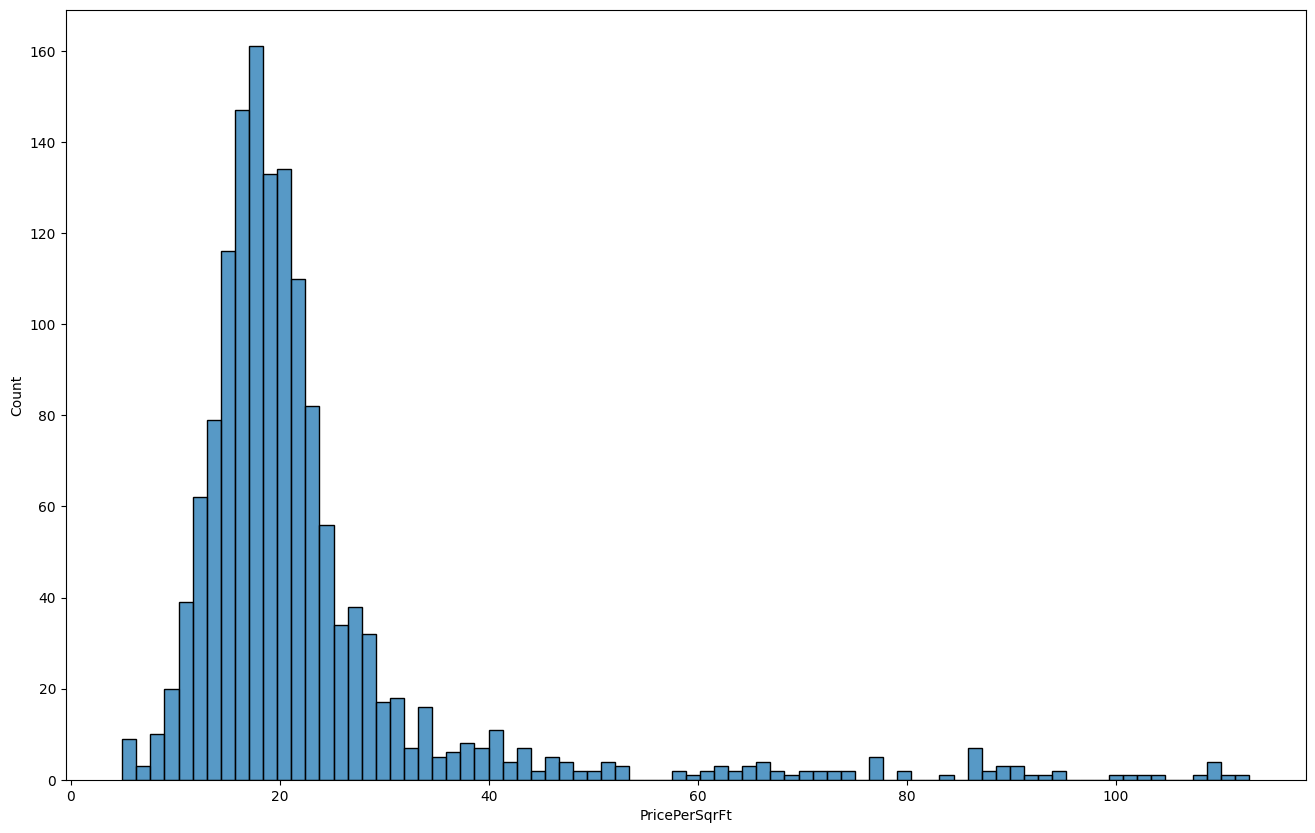

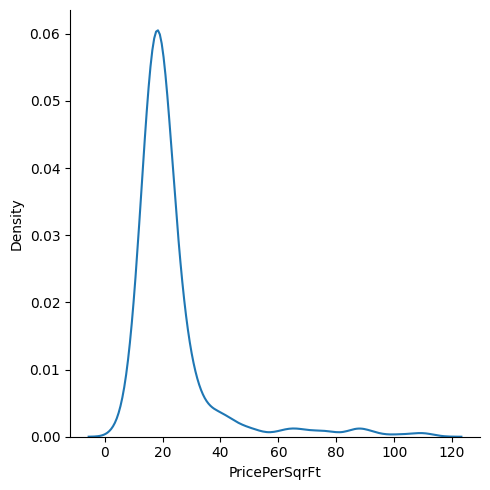

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, figsize=(16,10))

sns.histplot(test_data_csv["PricePerSqrFt"], ax = axs)
sns.displot(test_data_csv["PricePerSqrFt"], kind = 'kde') # I have no idea what it means..

print(test_data_csv["PricePerSqrFt"].describe())

# FUNCTIONS FOR PLOTS!

In [204]:
#define Seaborn color palette to use
import numpy as np
def plot_pie_for_unique_category(df,col_name_x, ax):
    colors = sns.color_palette('pastel')
    unique_v_df = (df[col_name_x].value_counts()).to_frame()
    unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
    unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)



def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    unique_v_df = (df[col_name_x].value_counts()).to_frame()
    unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
    fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
    i = 0;
    for index, row in unique_v_df.iterrows():
        value_percent = row.iloc[1];
        value = row.iloc[0];
        name = index;
        sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
        axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
        axs[i].legend()
        i+=1
    fig.suptitle(f"{col_name_x} on {col_name_y}")

    
def plot_unique_category(df,col_name_x,col_name_y,plotType=""):
    plot_hist_for_unique_category(df,col_name_x,col_name_y)
    fig, axs = plt.subplots(1, 2, figsize=(10,10))
    fig.tight_layout()
    plot_pie_for_unique_category(df,col_name_x,axs[0])
    sns.boxenplot(data=test_data_csv, x=col_name_x, y=col_name_y, ax = axs[1])
    plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    for col_name_x in col_names_x:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        plt.show()

def plot_pie_for_unique_category_array(df,col_names_x):
    for col_name_x in col_names_x:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}")
        plt.plot()


# PLOTTING!

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

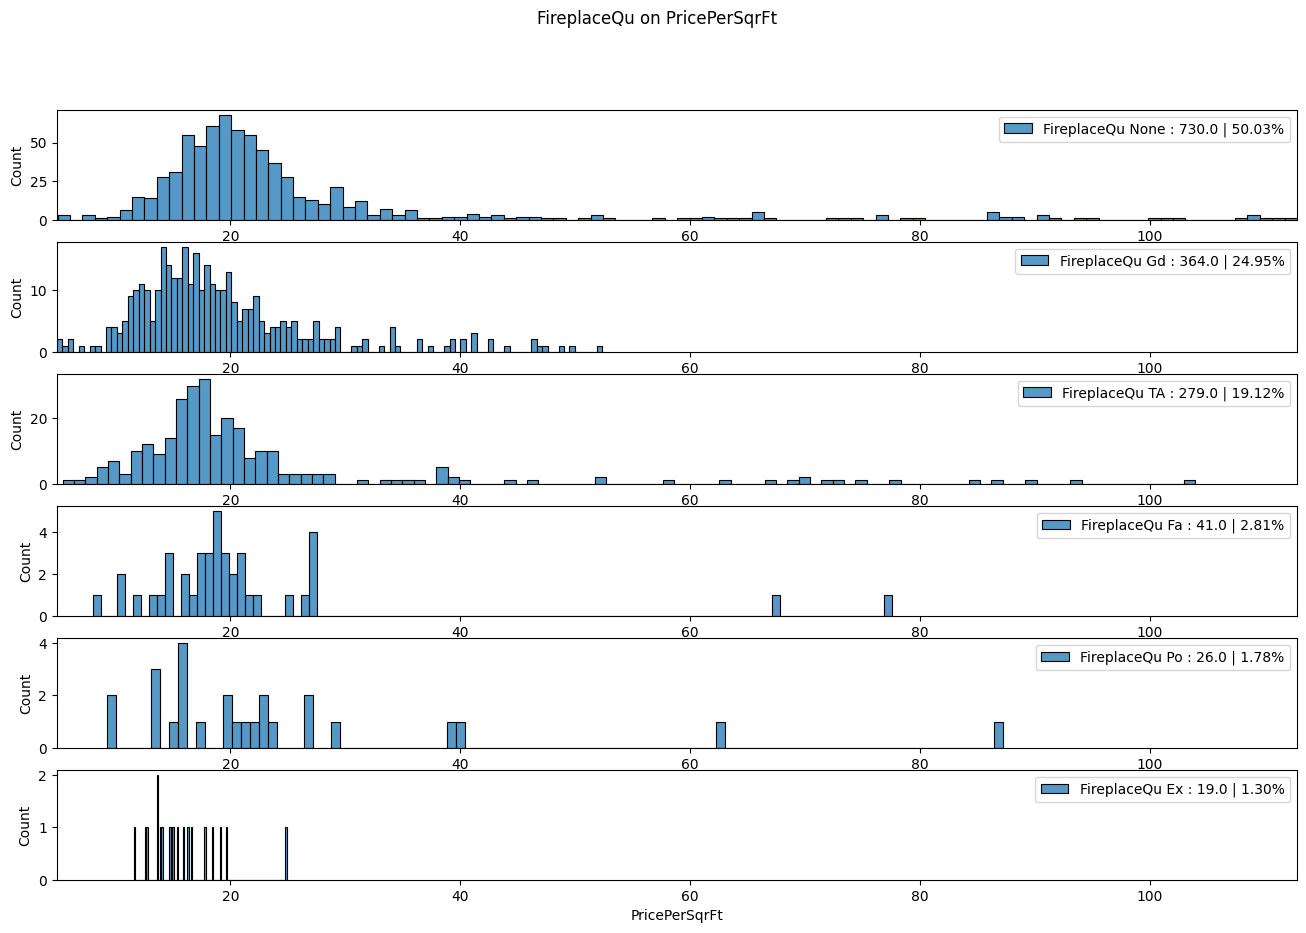

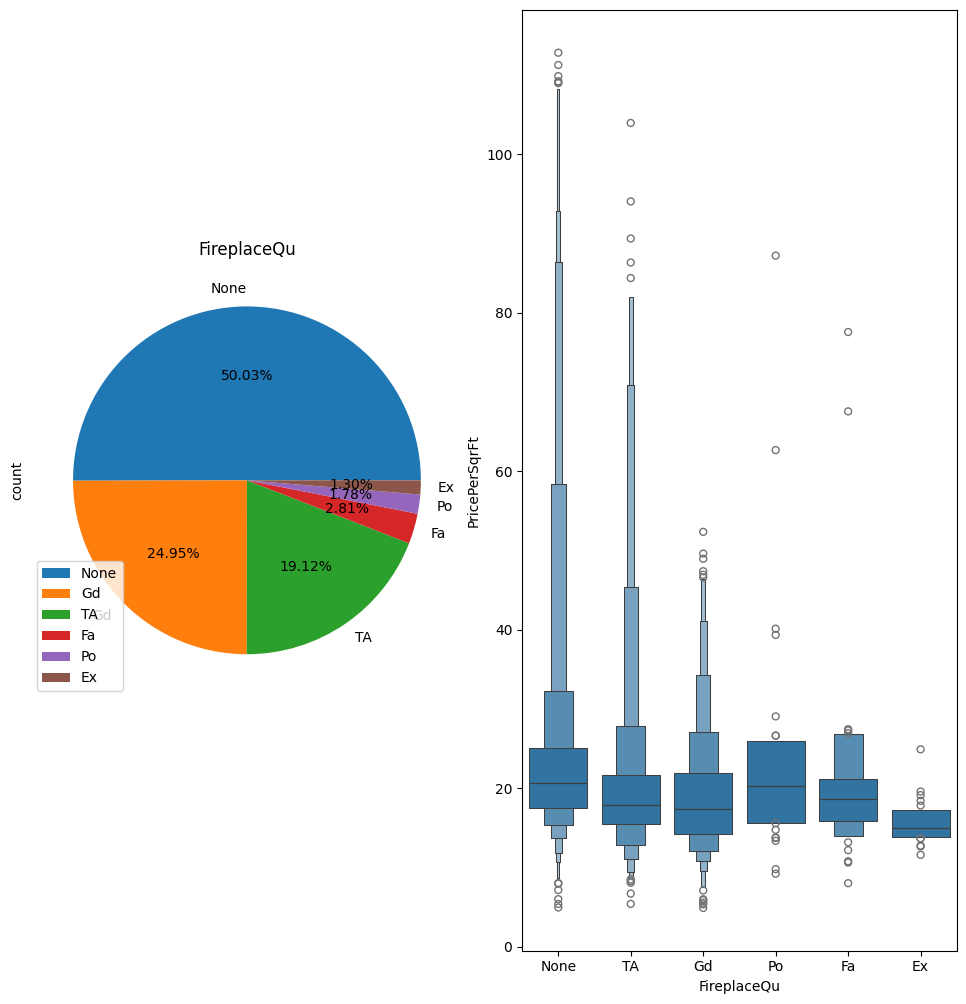

In [206]:
#EFILRYN FireplaceQu does not count into price
plot_unique_category(test_data_csv,'FireplaceQu','PricePerSqrFt');


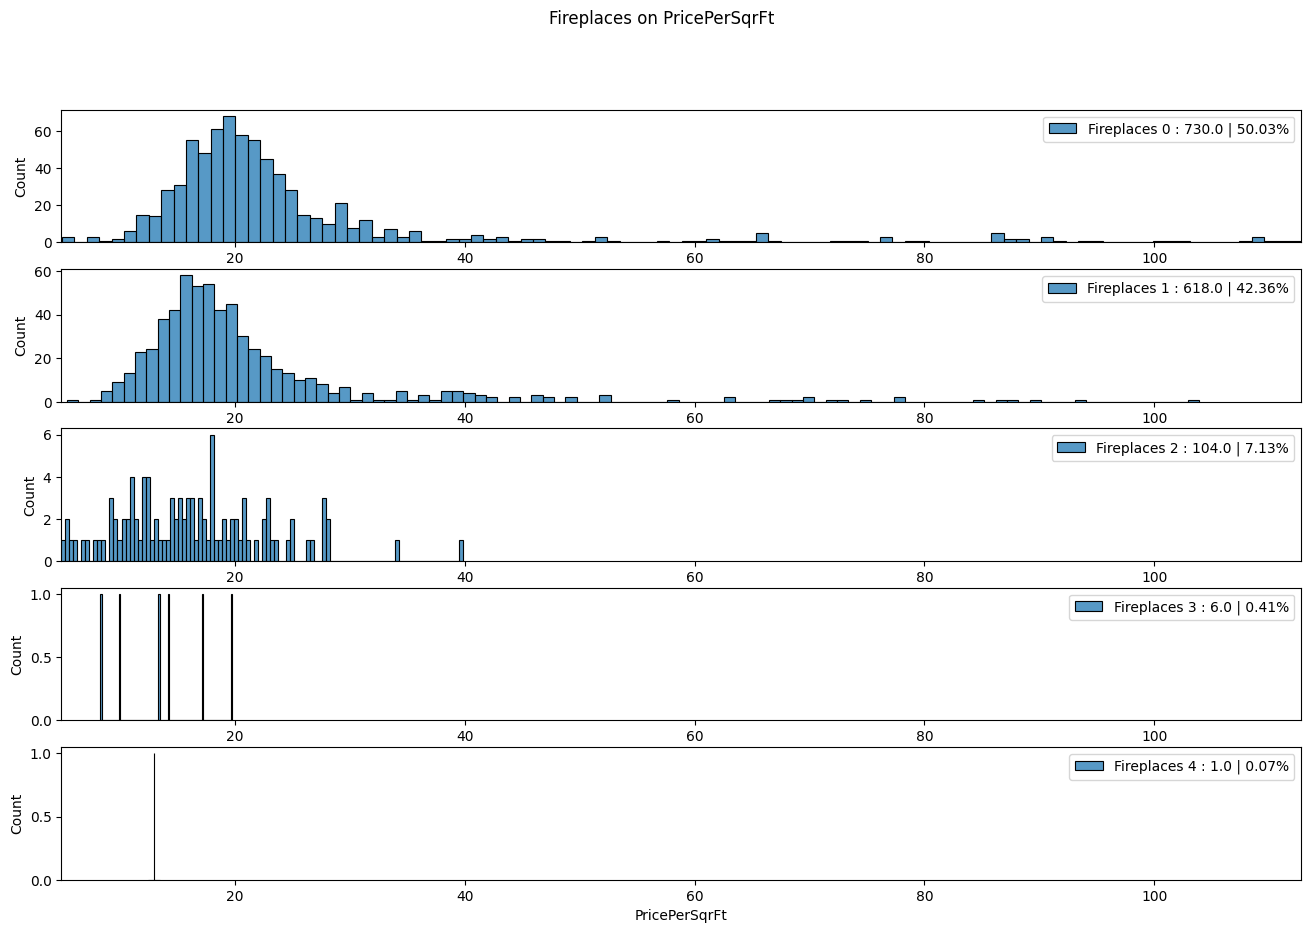

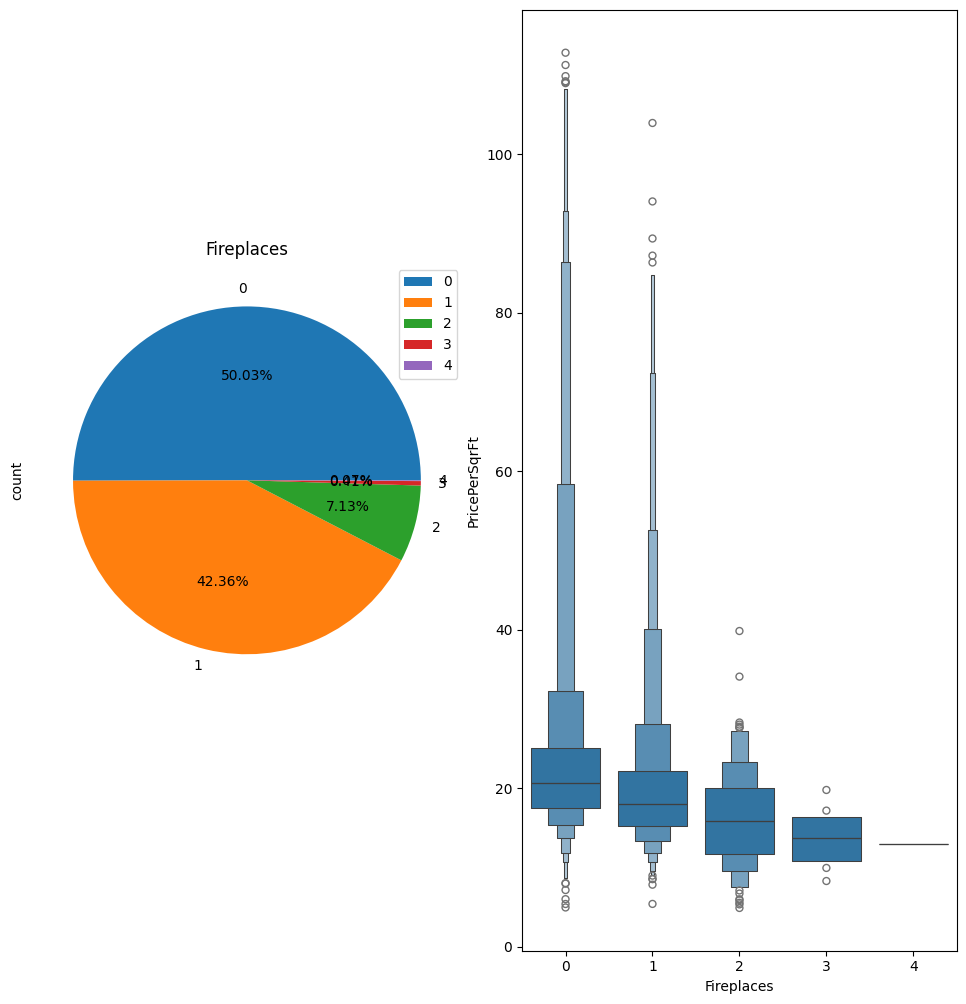

In [207]:
#EFILRYN Number Of fireplaces does not count into price
plot_unique_category(test_data_csv,'Fireplaces','PricePerSqrFt');

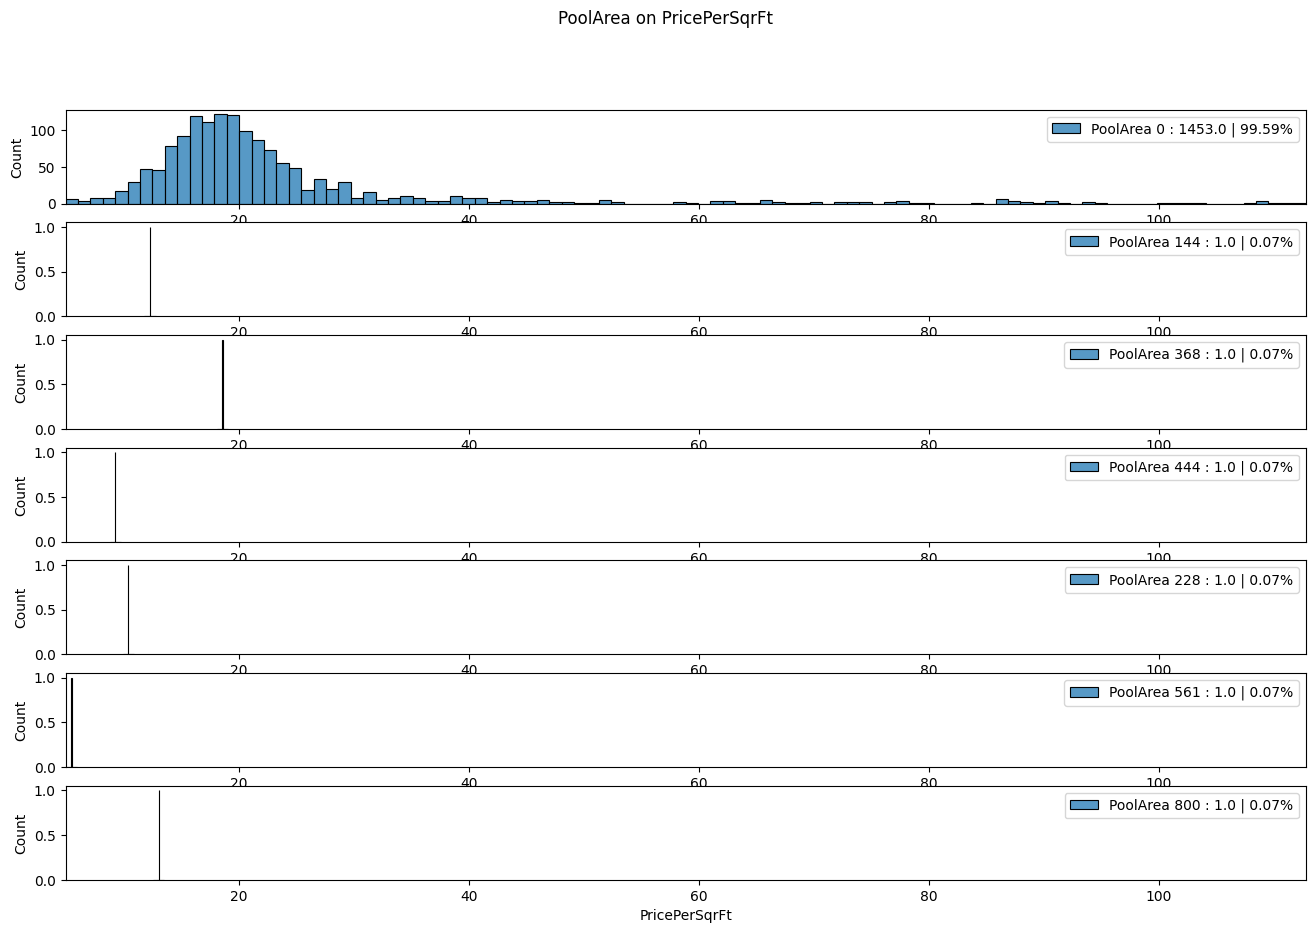

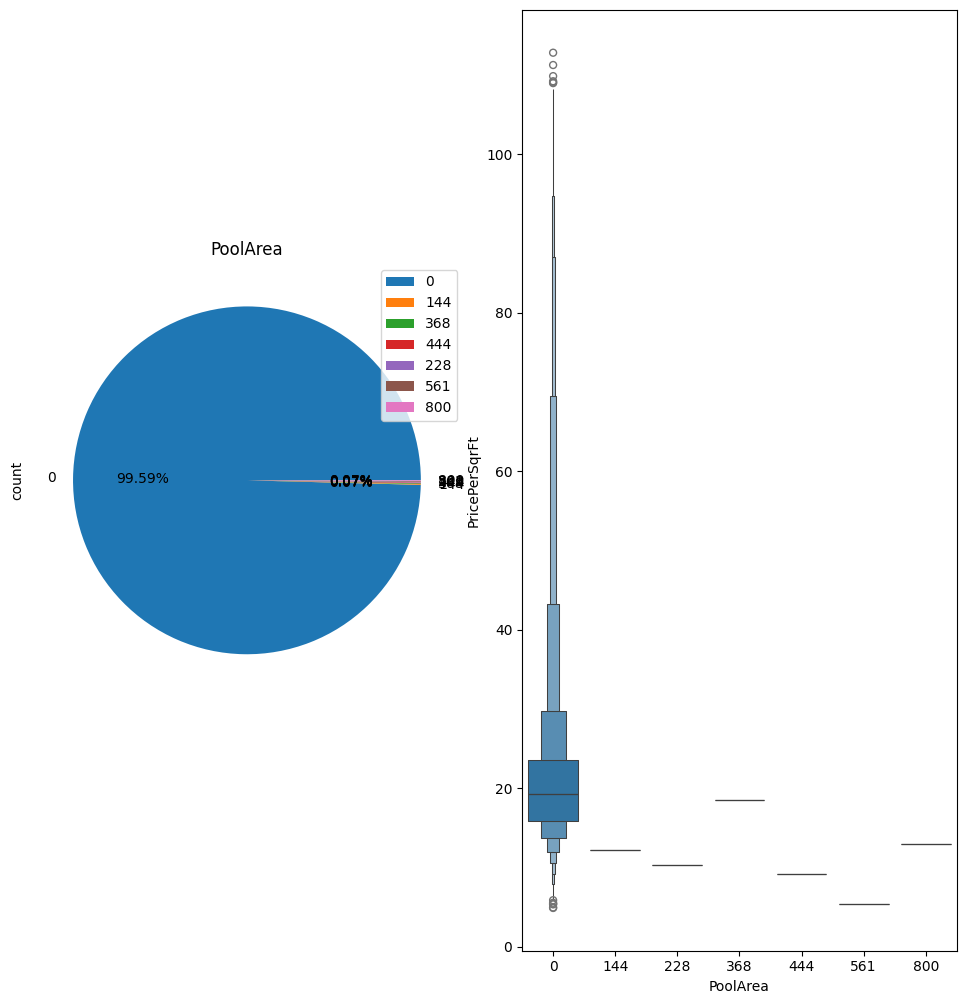

In [208]:
plot_unique_category(test_data_csv,'PoolArea','PricePerSqrFt');


/home/v/.virtualenvs/AI/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


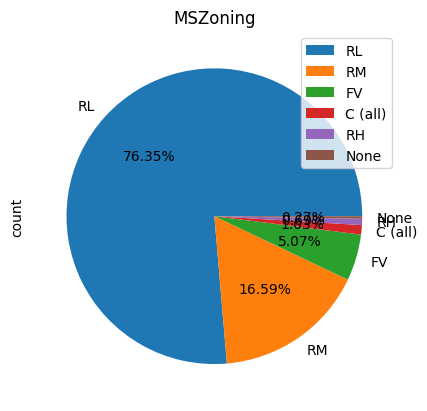

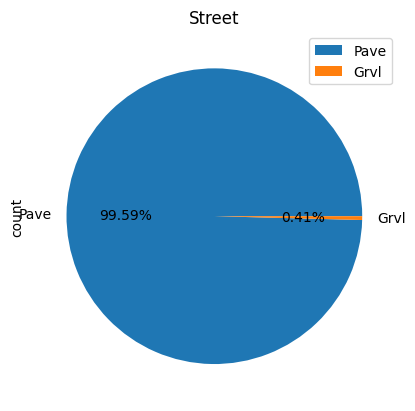

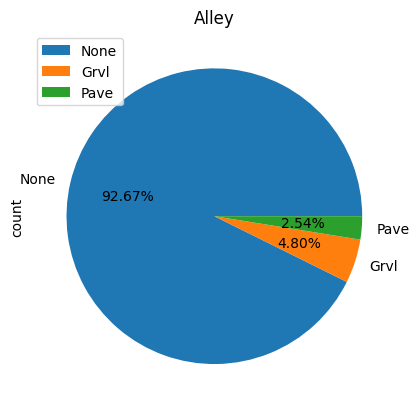

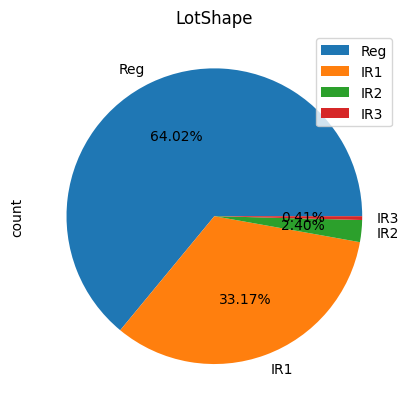

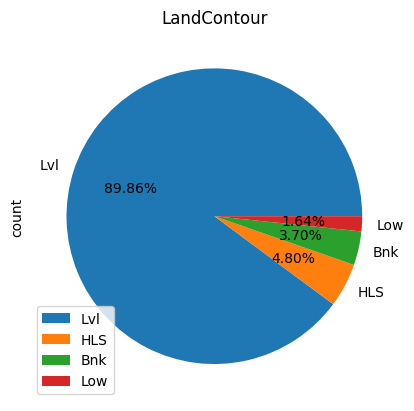

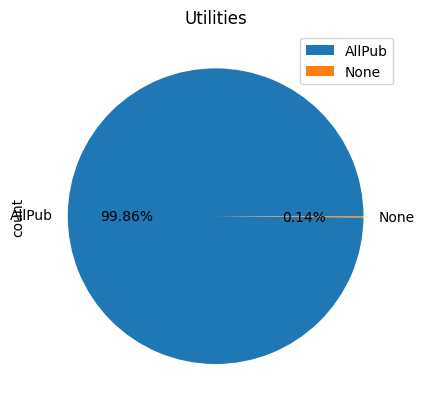

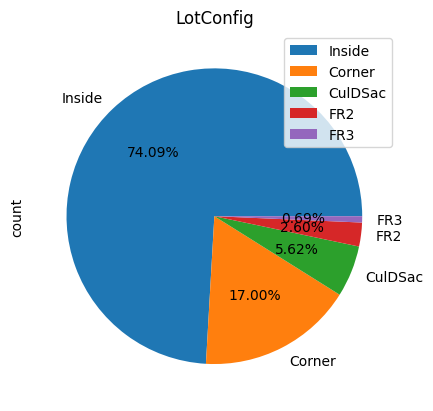

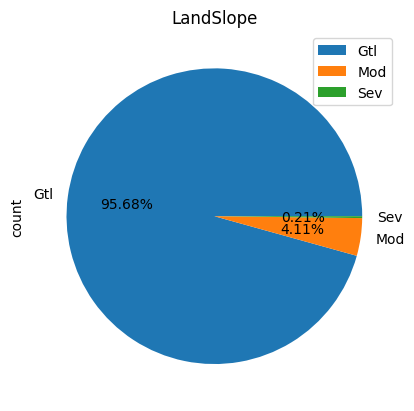

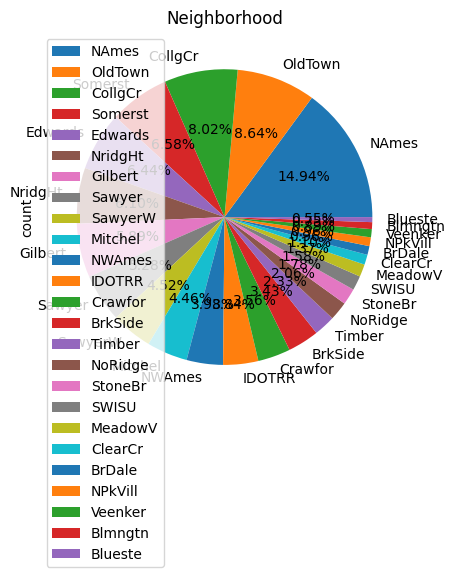

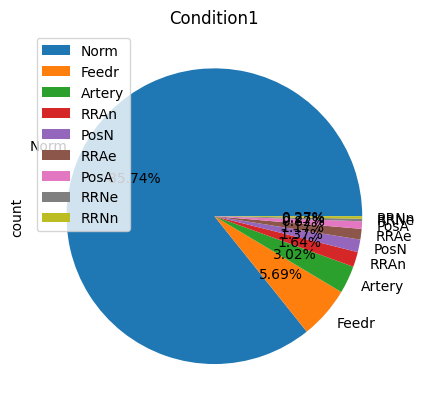

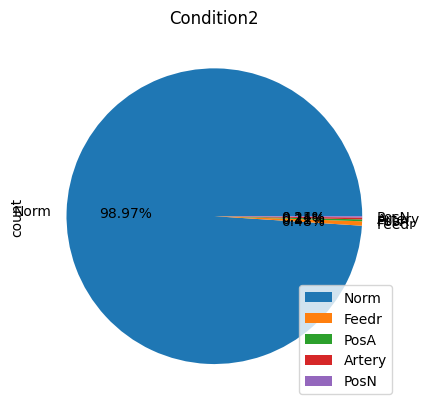

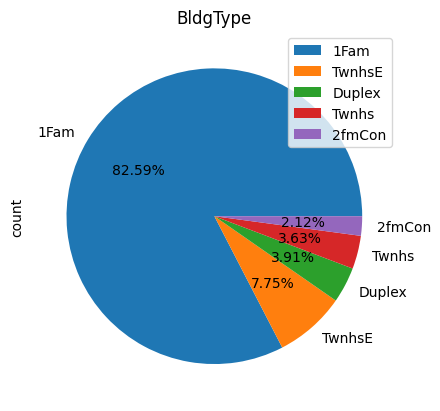

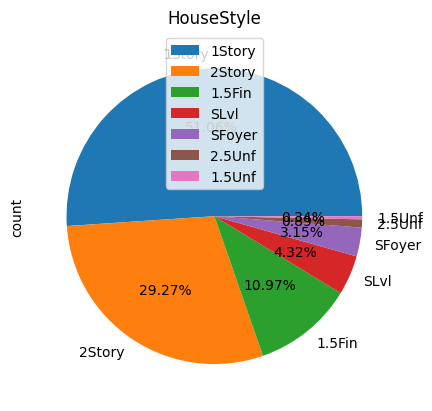

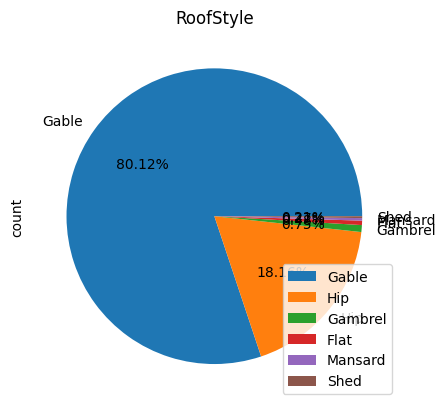

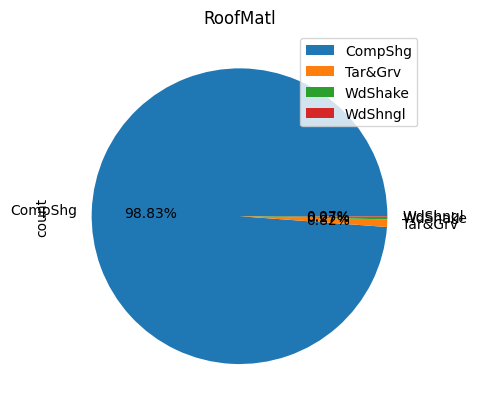

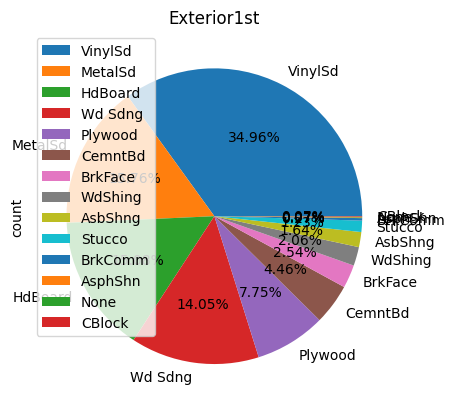

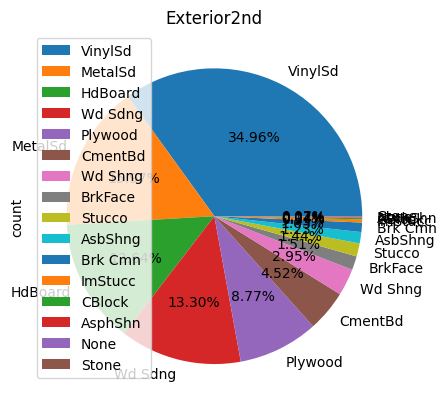

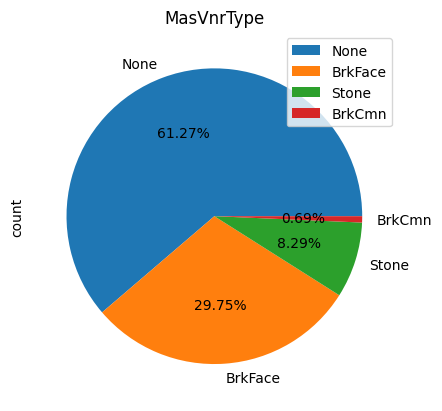

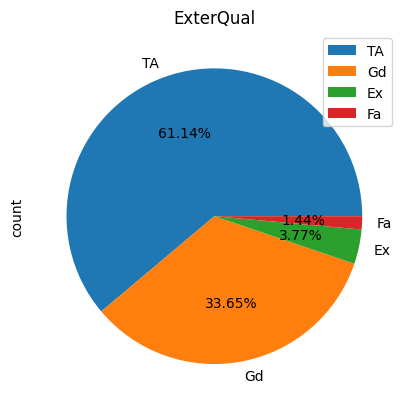

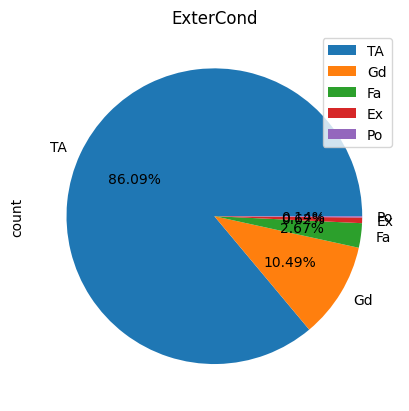

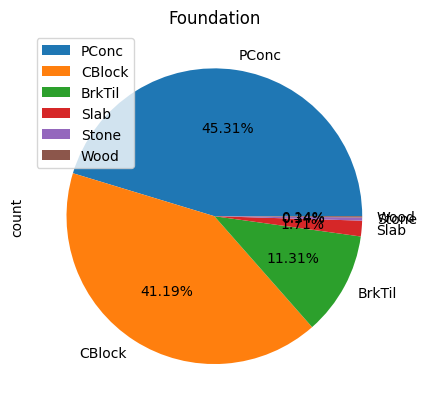

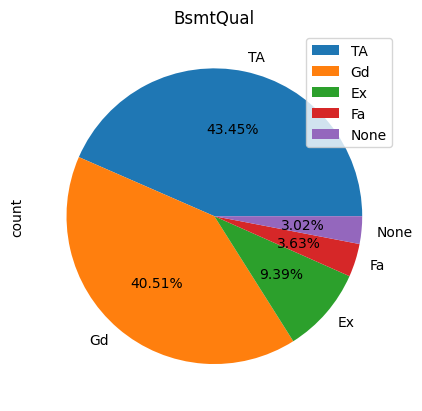

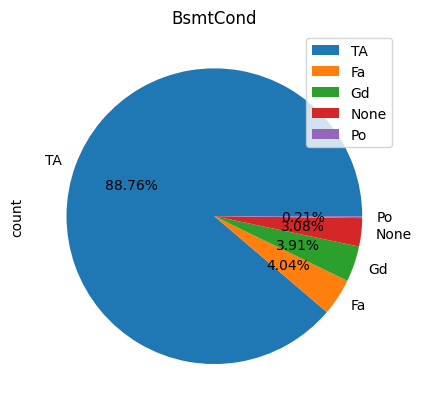

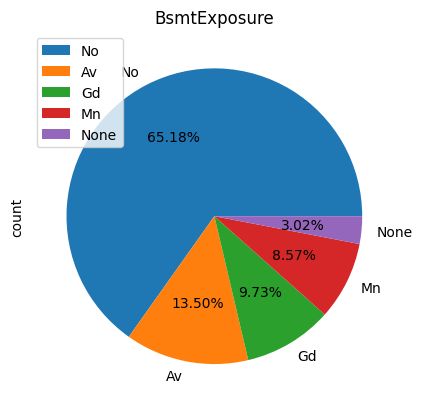

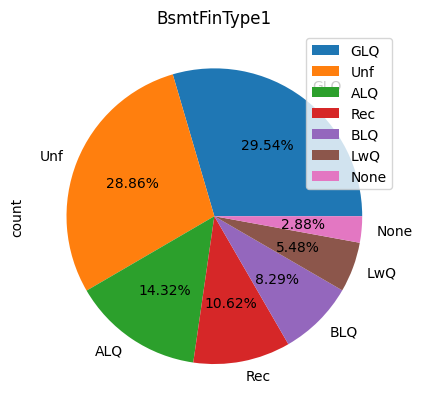

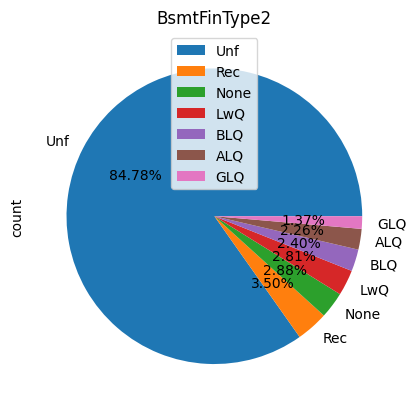

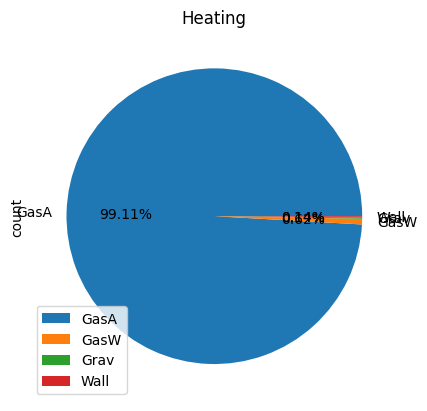

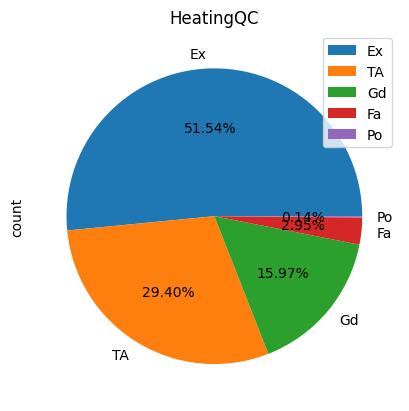

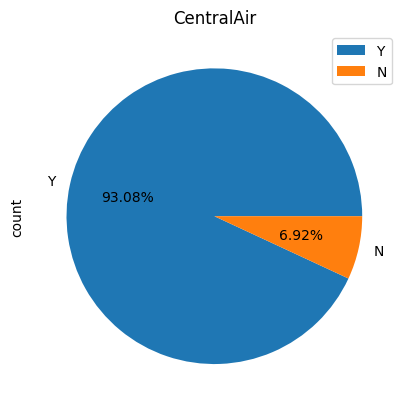

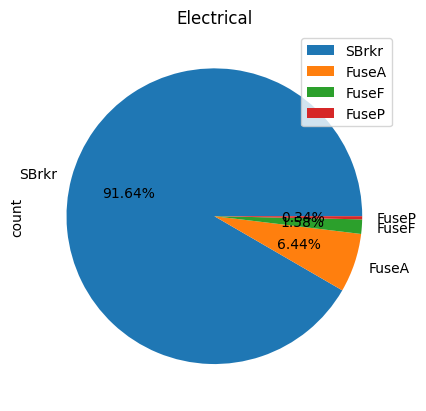

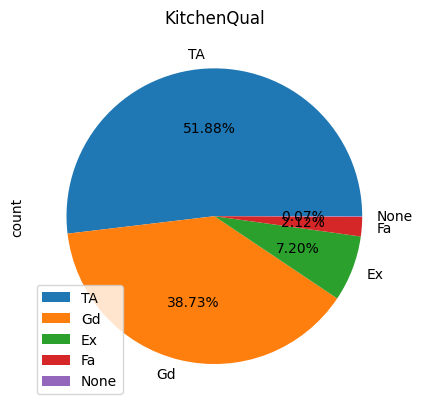

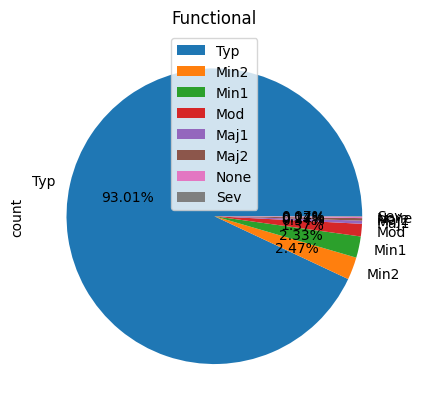

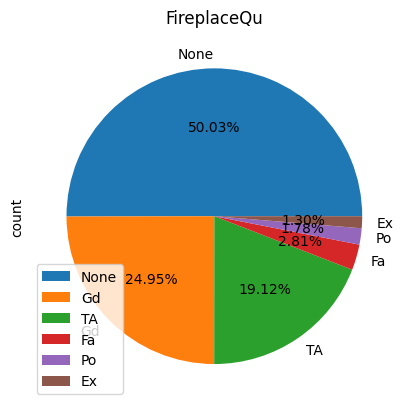

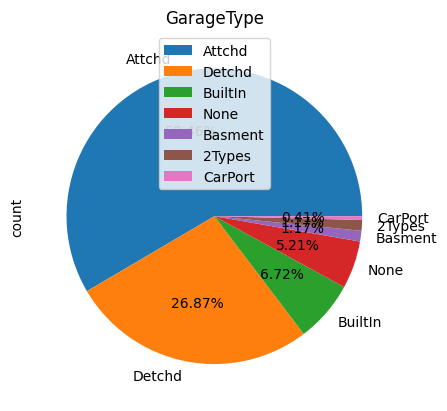

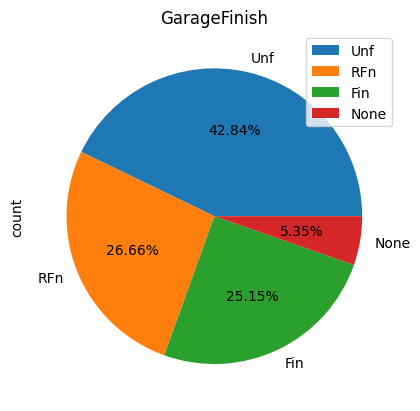

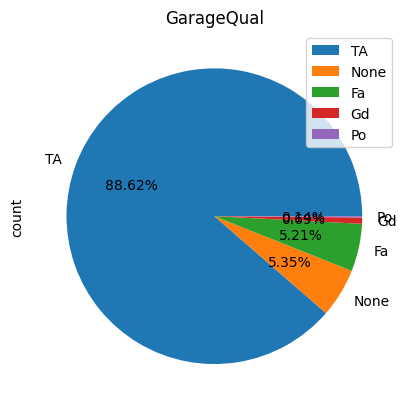

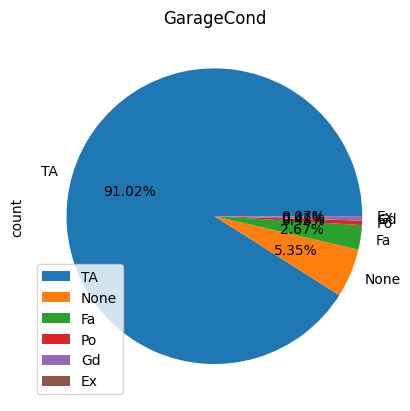

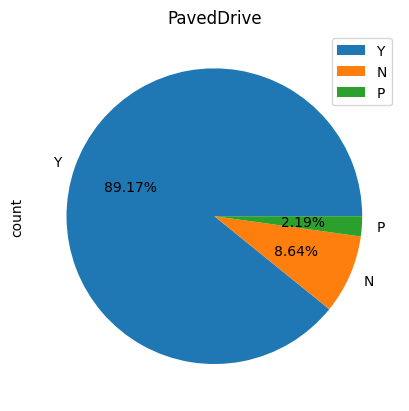

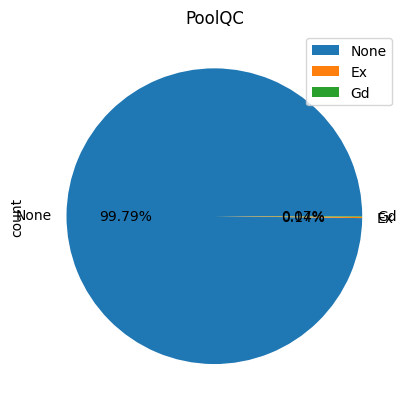

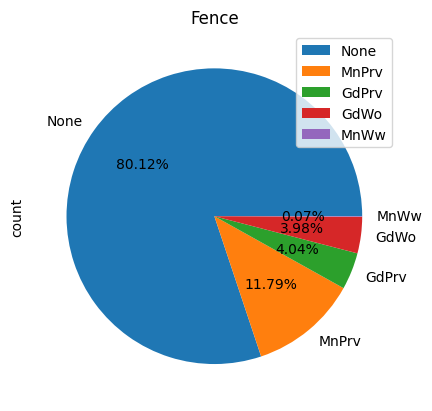

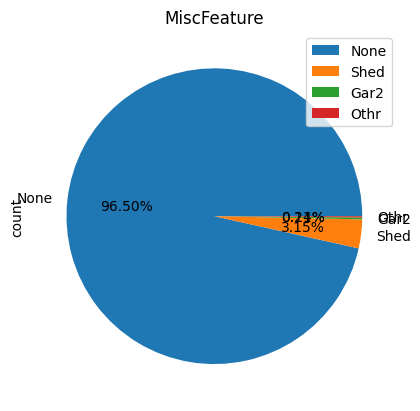

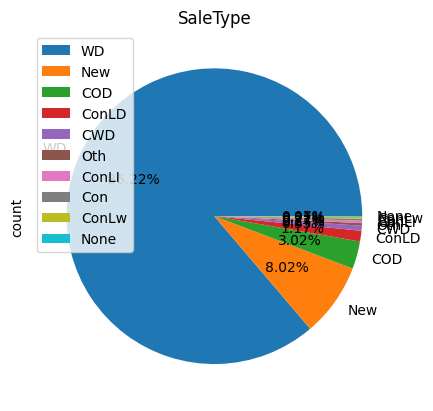

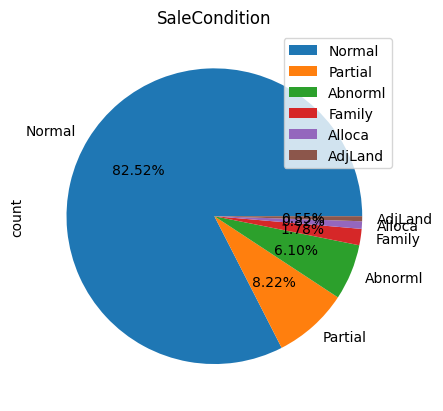

In [209]:
number_cols = test_data_csv.select_dtypes(include='object')

plot_pie_for_unique_category_array(test_data_csv, number_cols.columns.to_numpy())

In [189]:
train_data_csv = pd.read_csv("train.csv")
print(train_data_csv.describe())
print(train_data_csv.shape)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

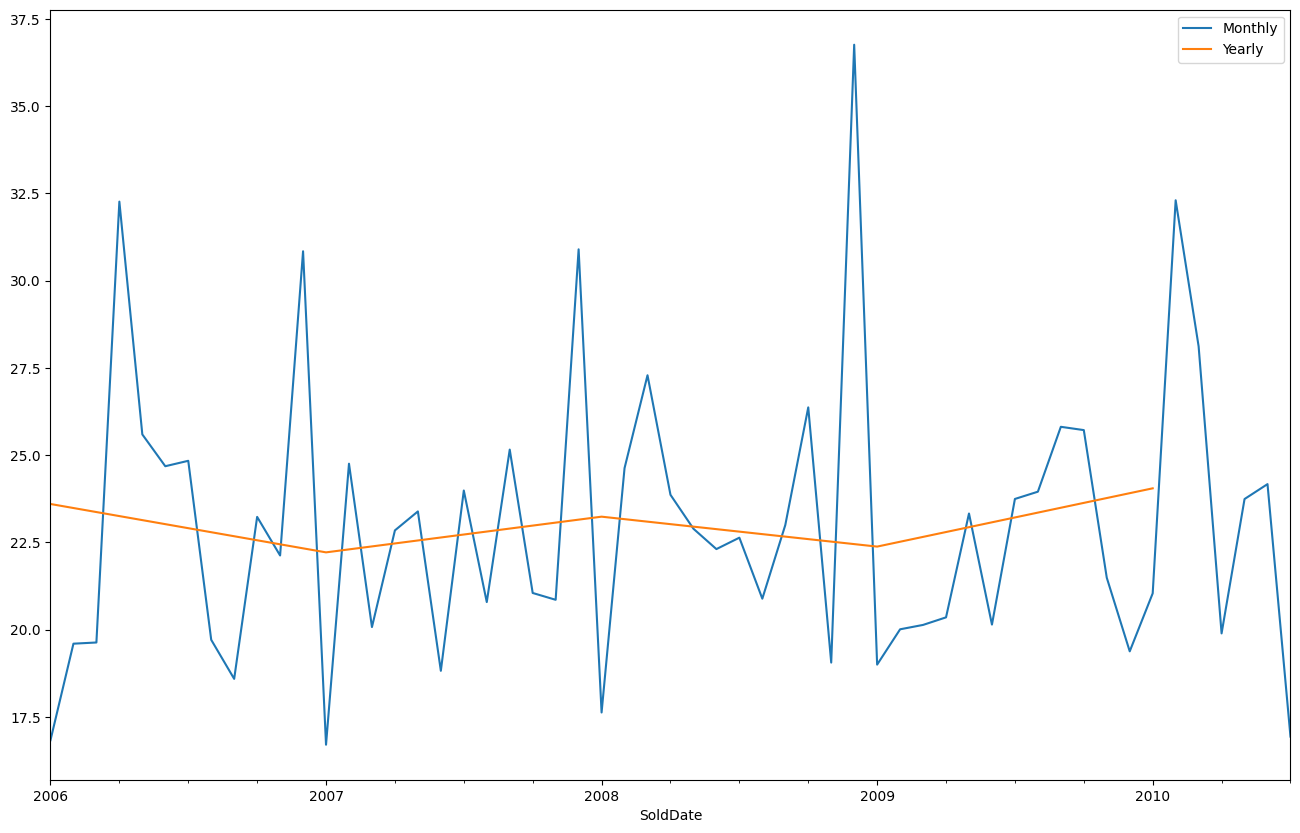

In [190]:
#price over years
#test_data_csv.plot.scatter(x='SoldDate',y='PricePerSqrFt')

test_data_csv.set_index('SoldDate').resample('ME')['PricePerSqrFt'].mean().plot.line(legend = True, figsize=(16,10))
test_data_csv.set_index('SoldDate').resample('YE')['PricePerSqrFt'].mean().plot.line(legend = True, figsize=(16,10))
plt.legend(["Monthly", "Yearly"]);



['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


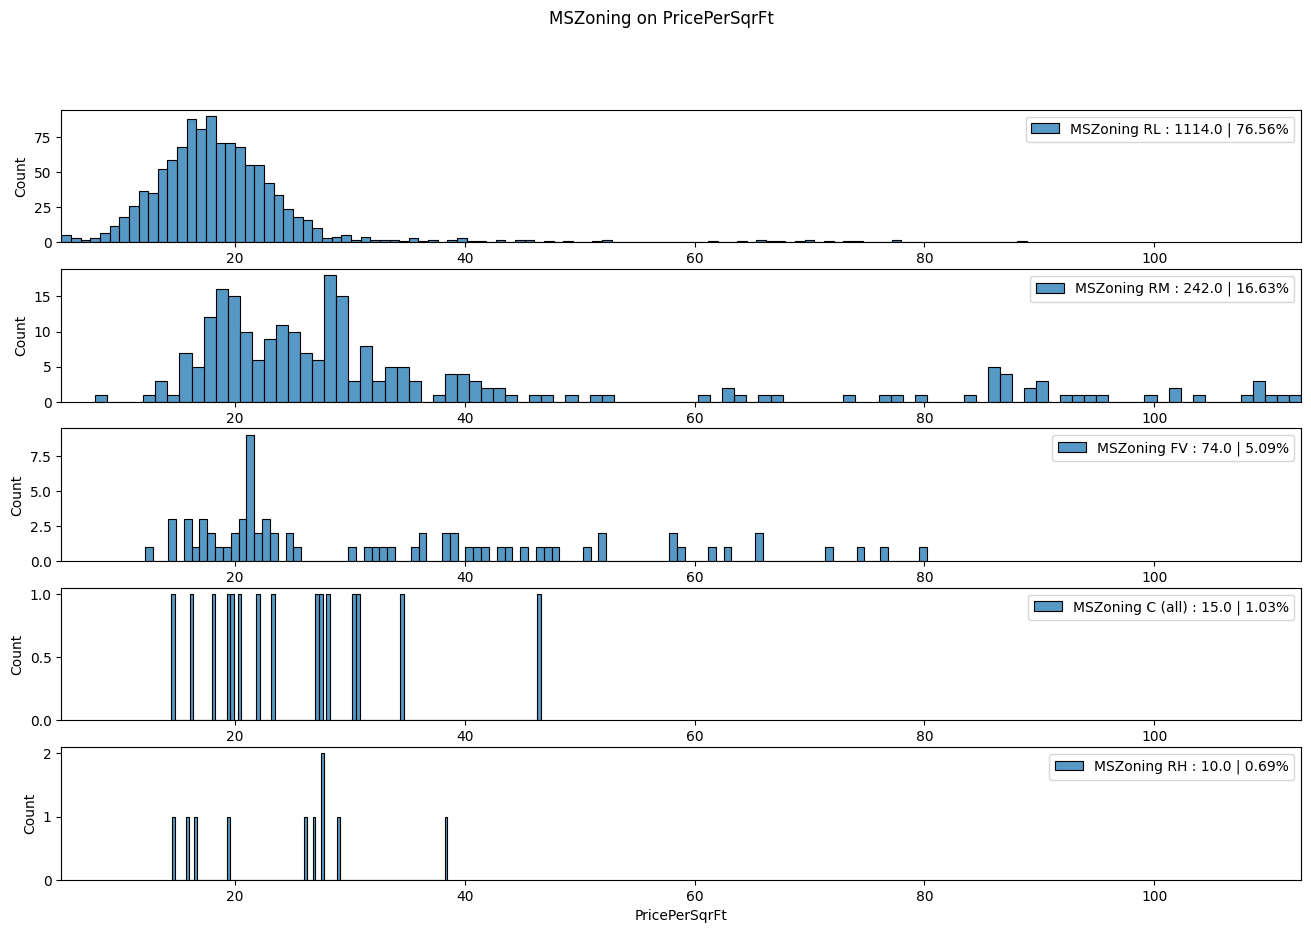

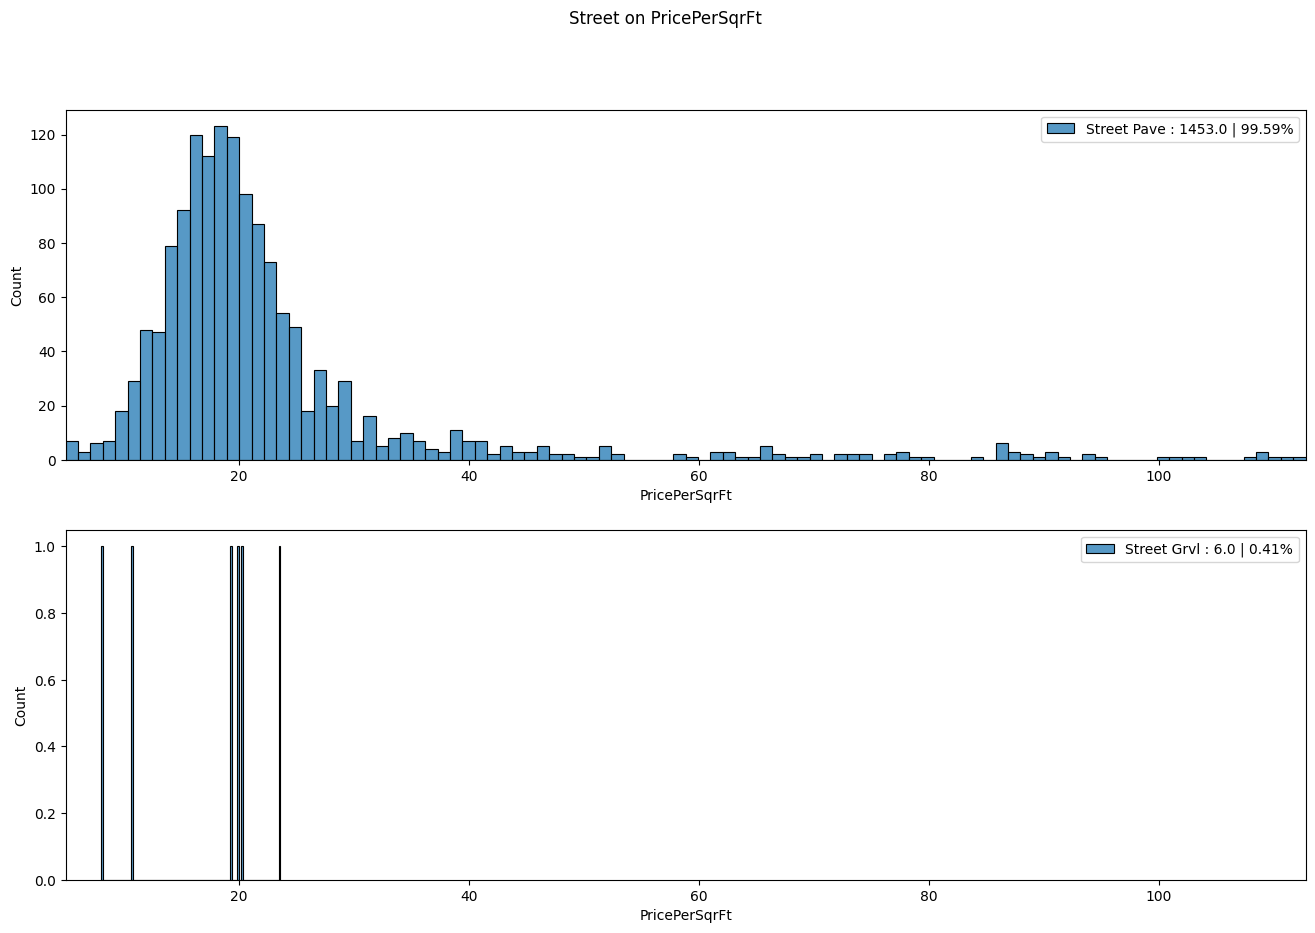

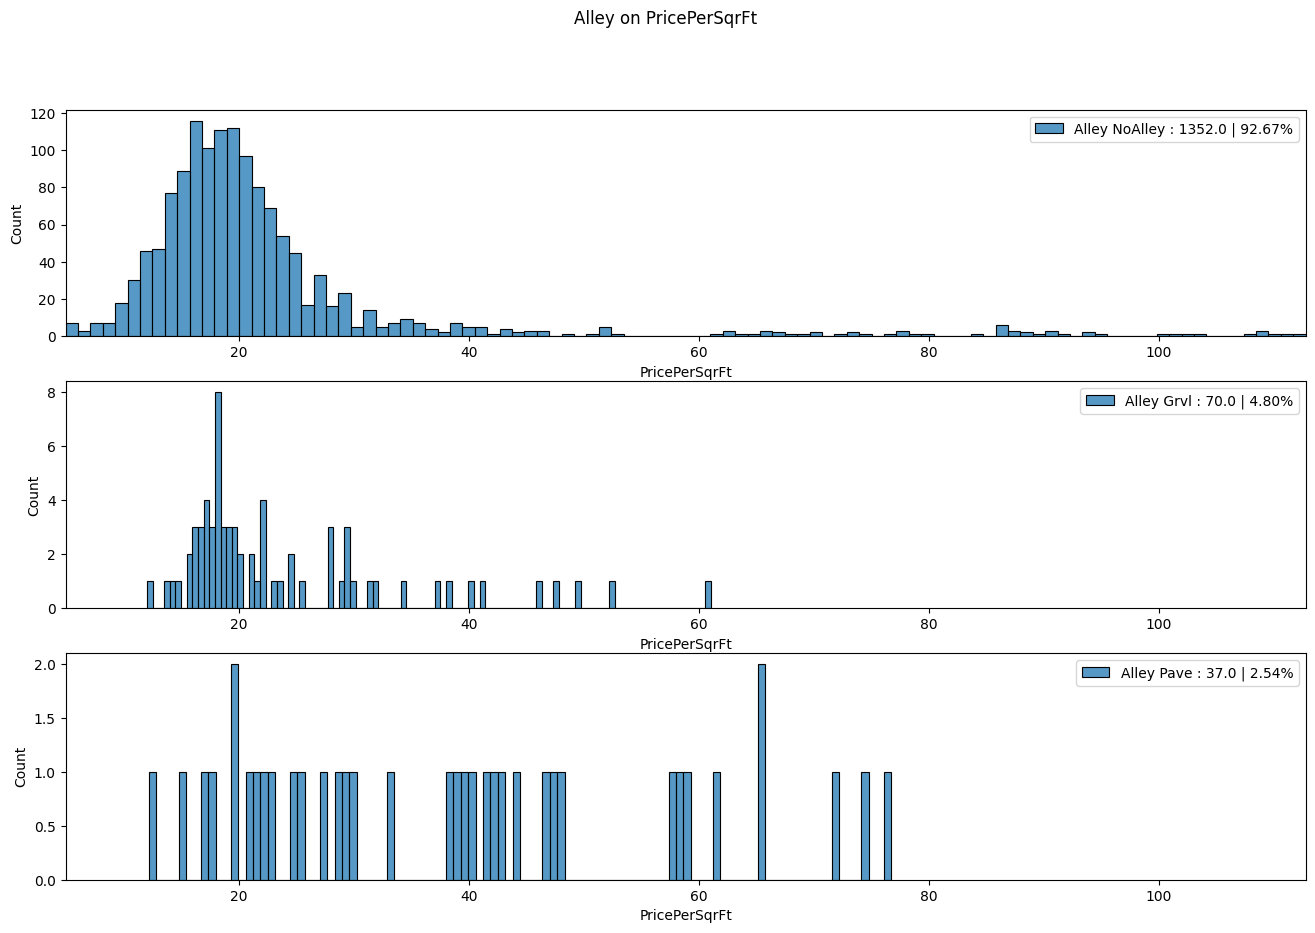

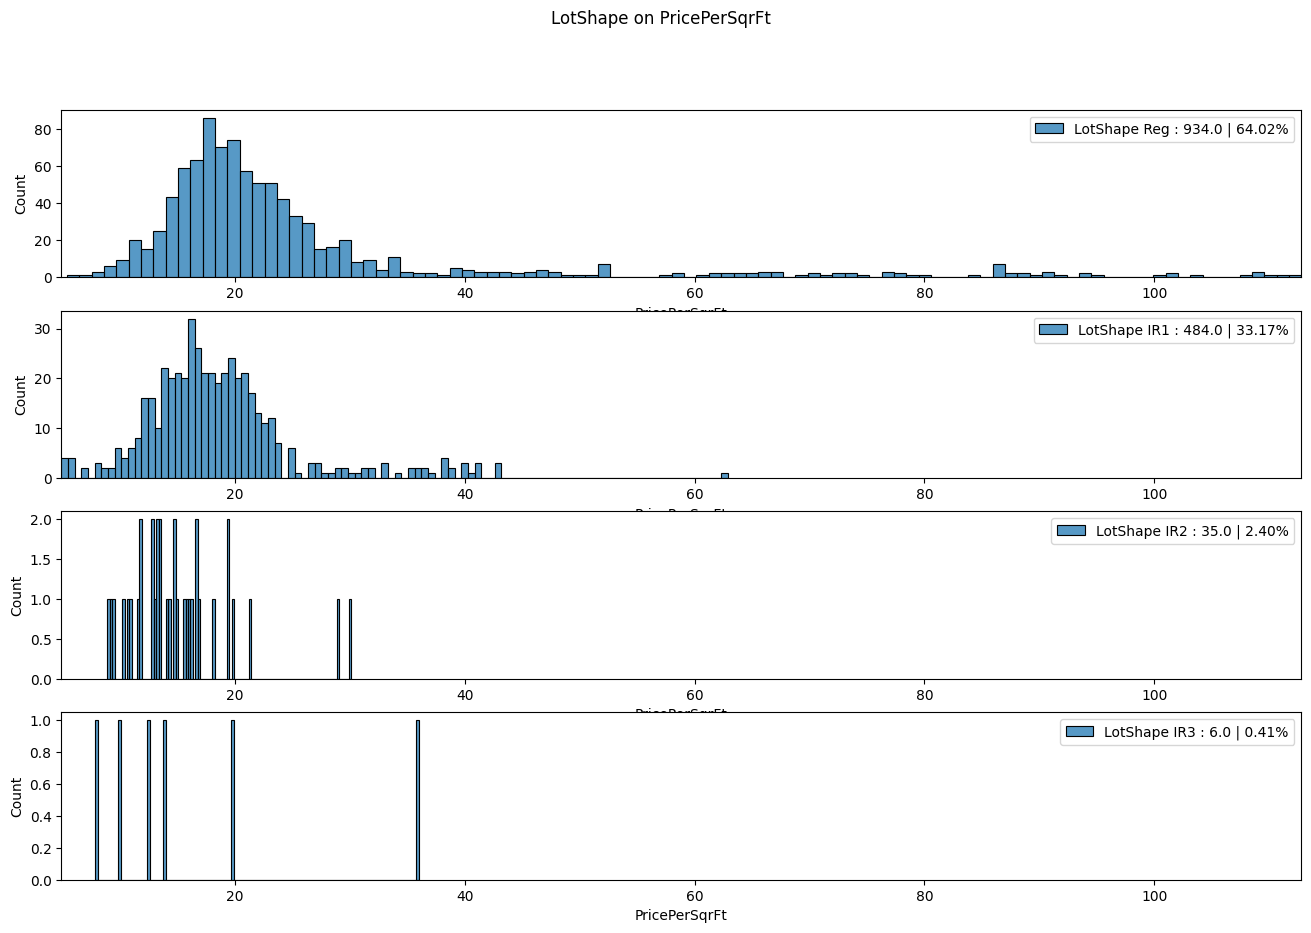

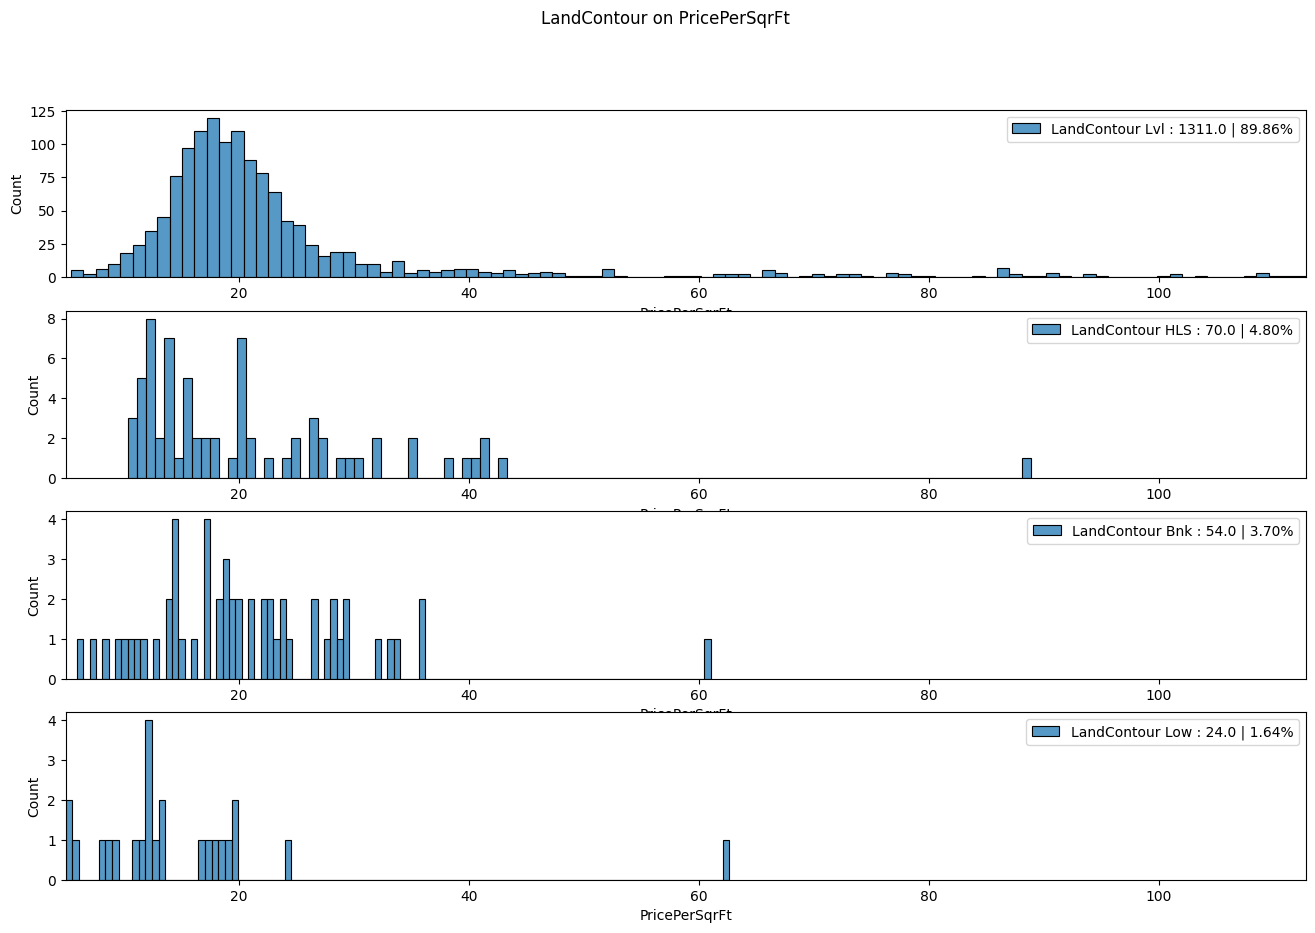

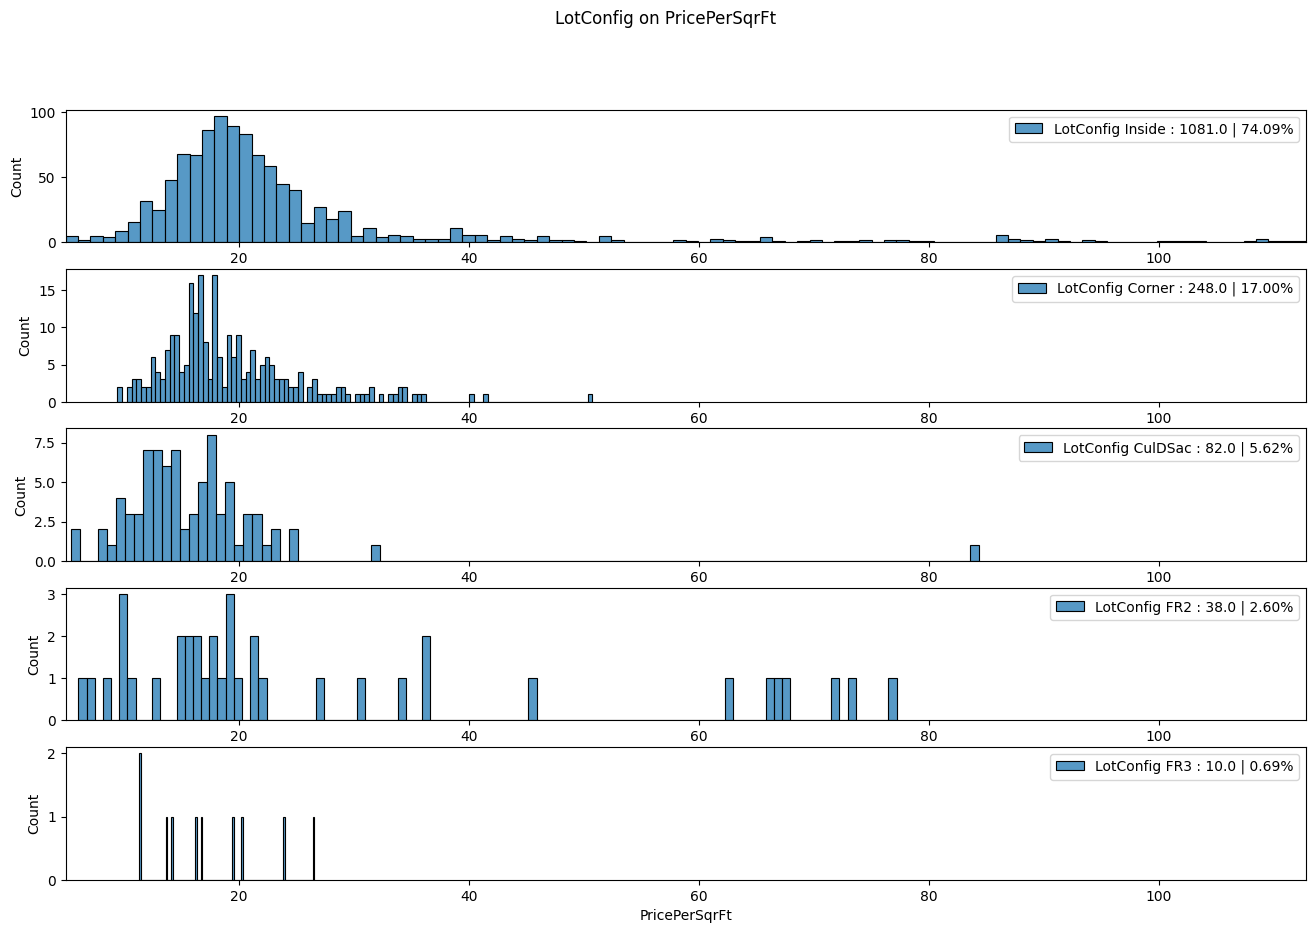

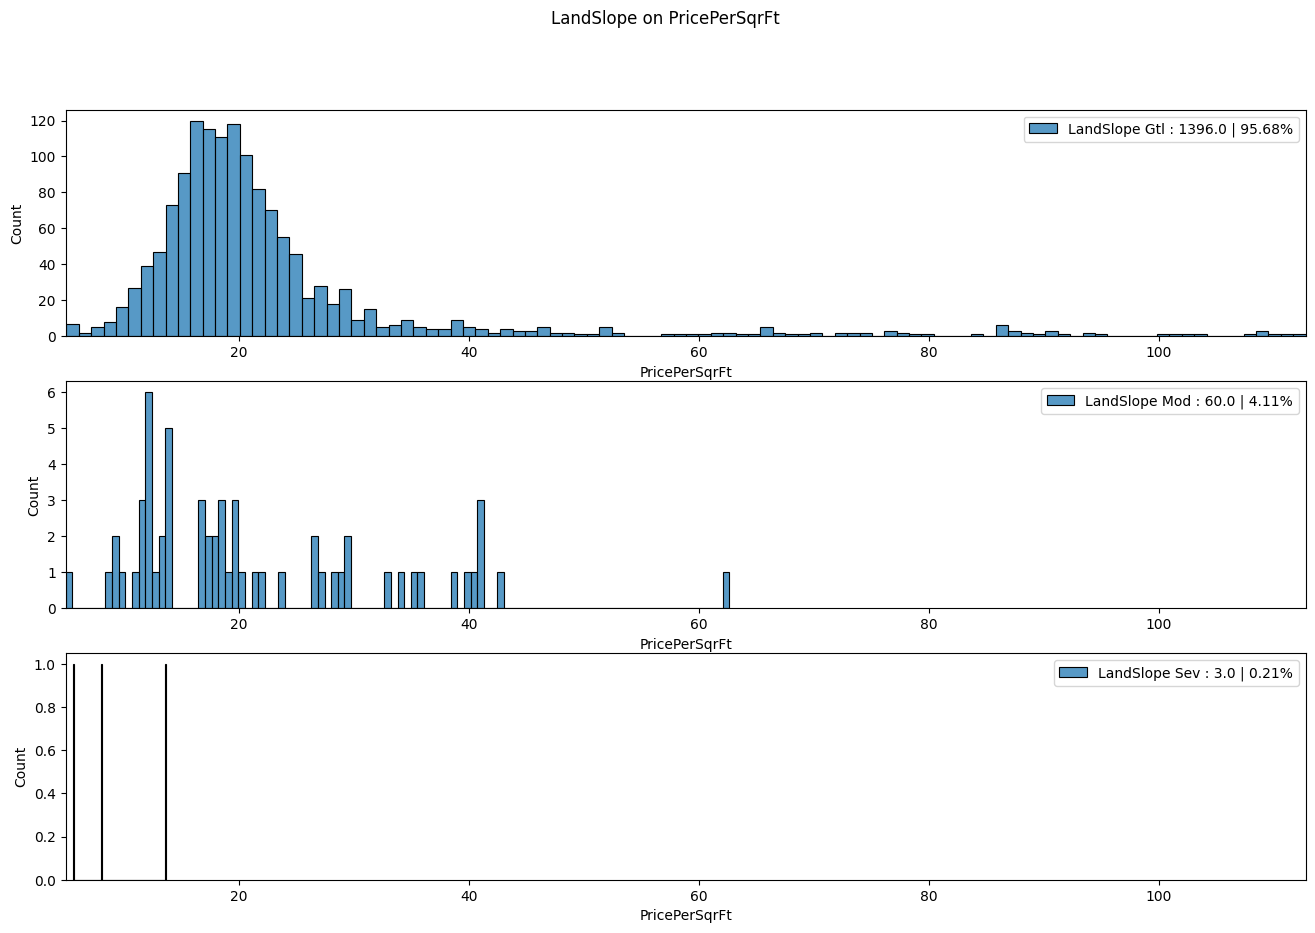

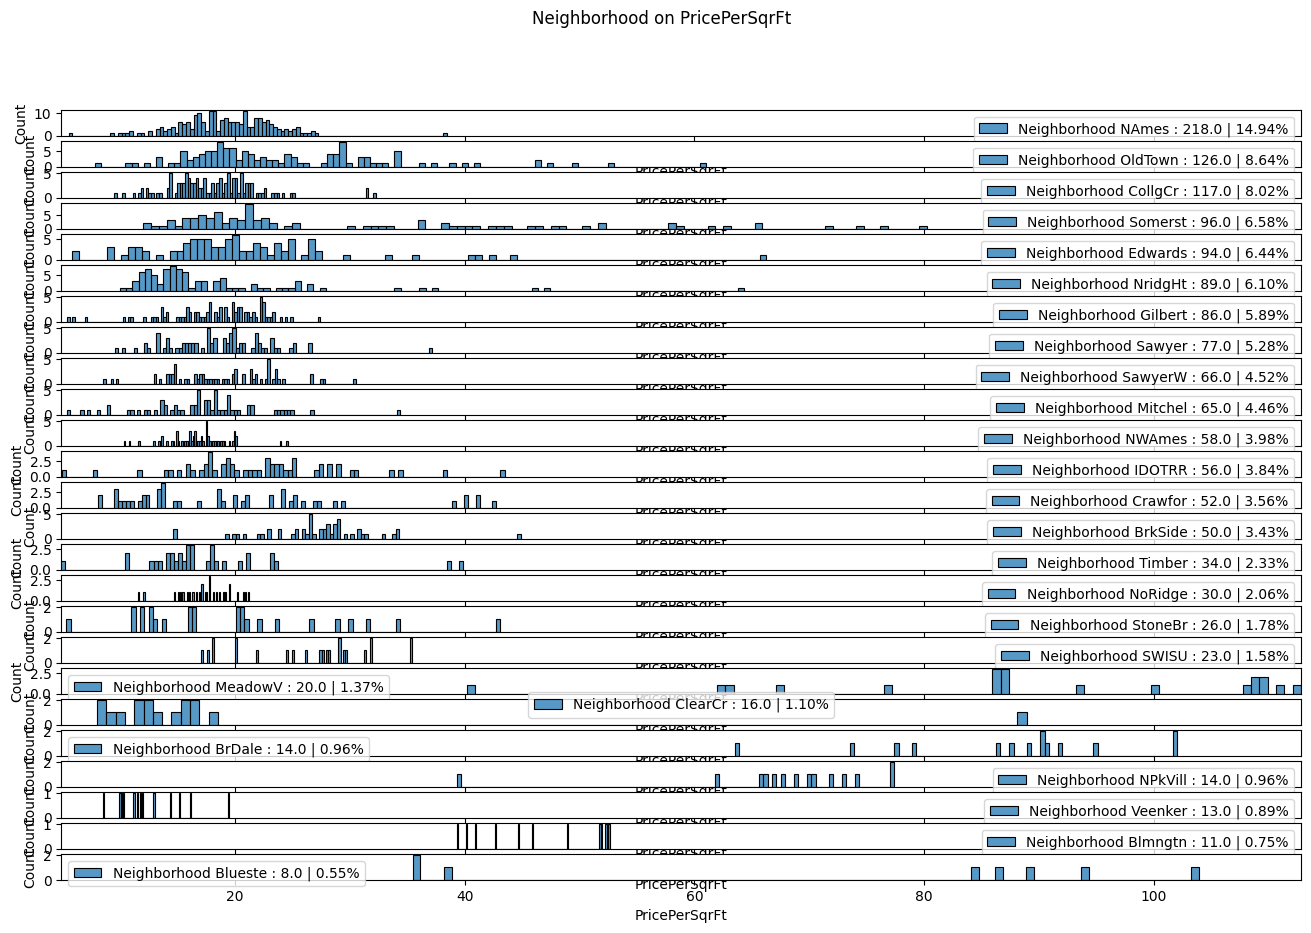

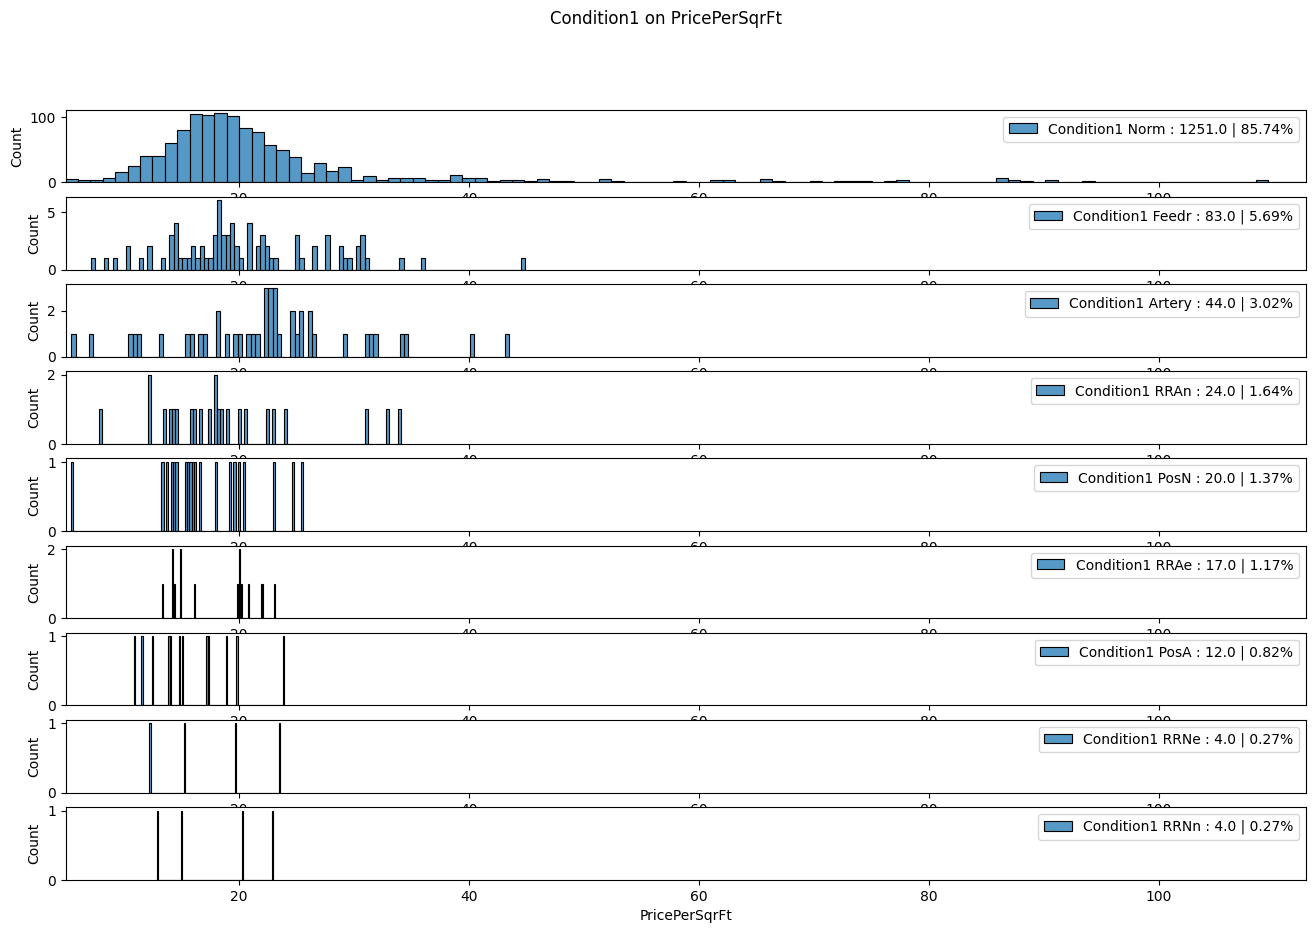

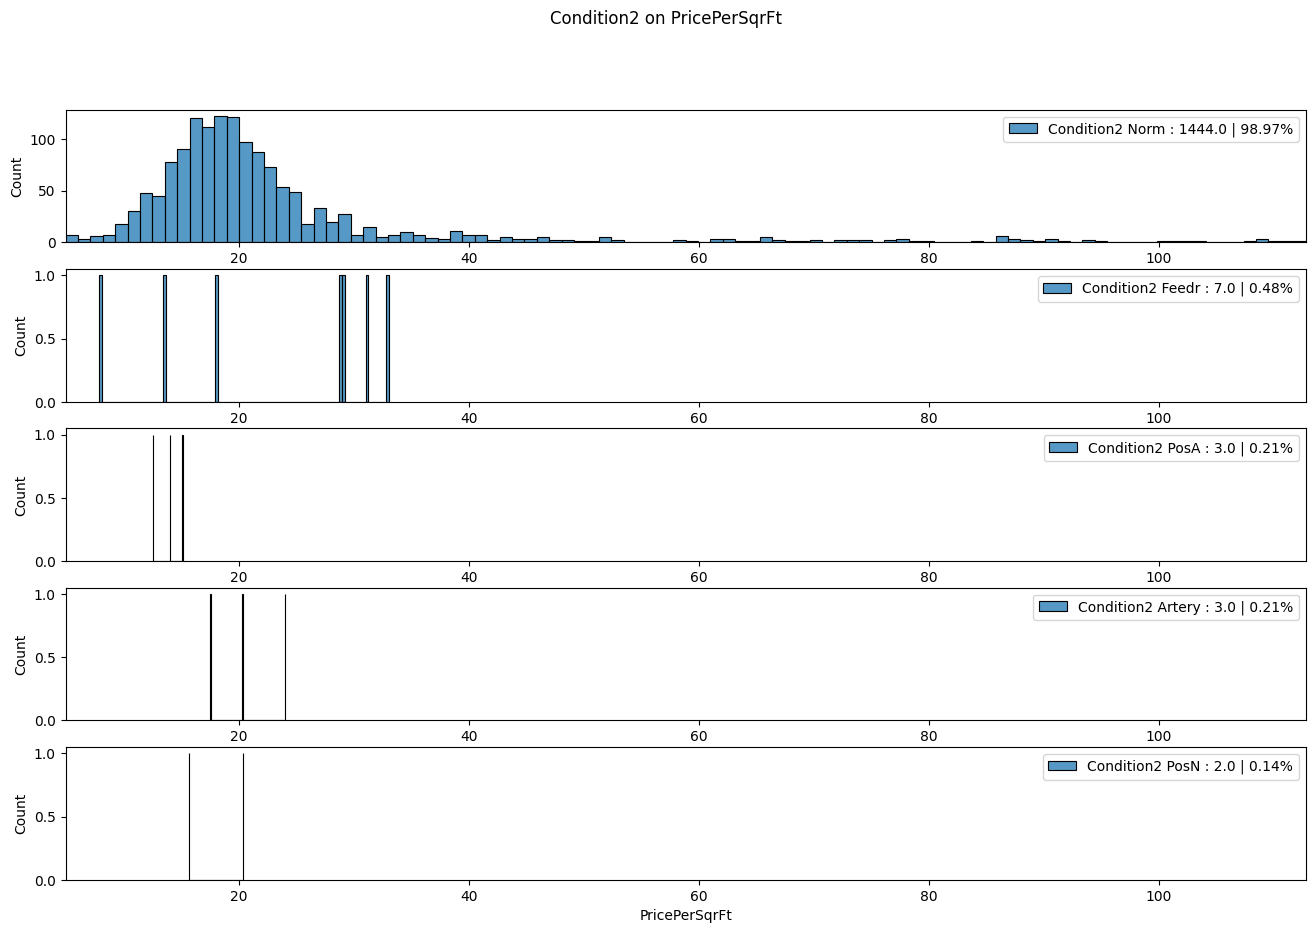

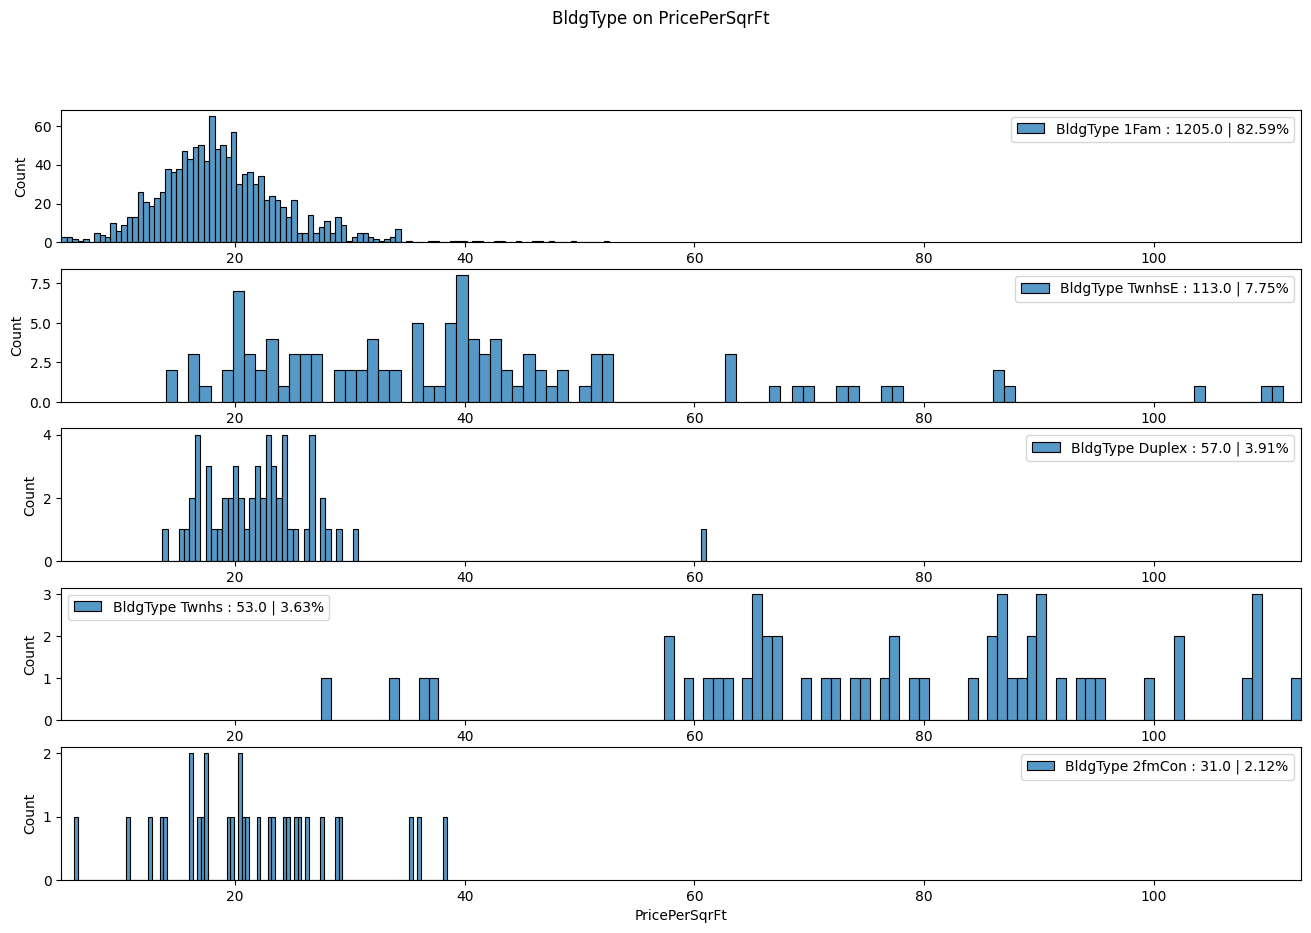

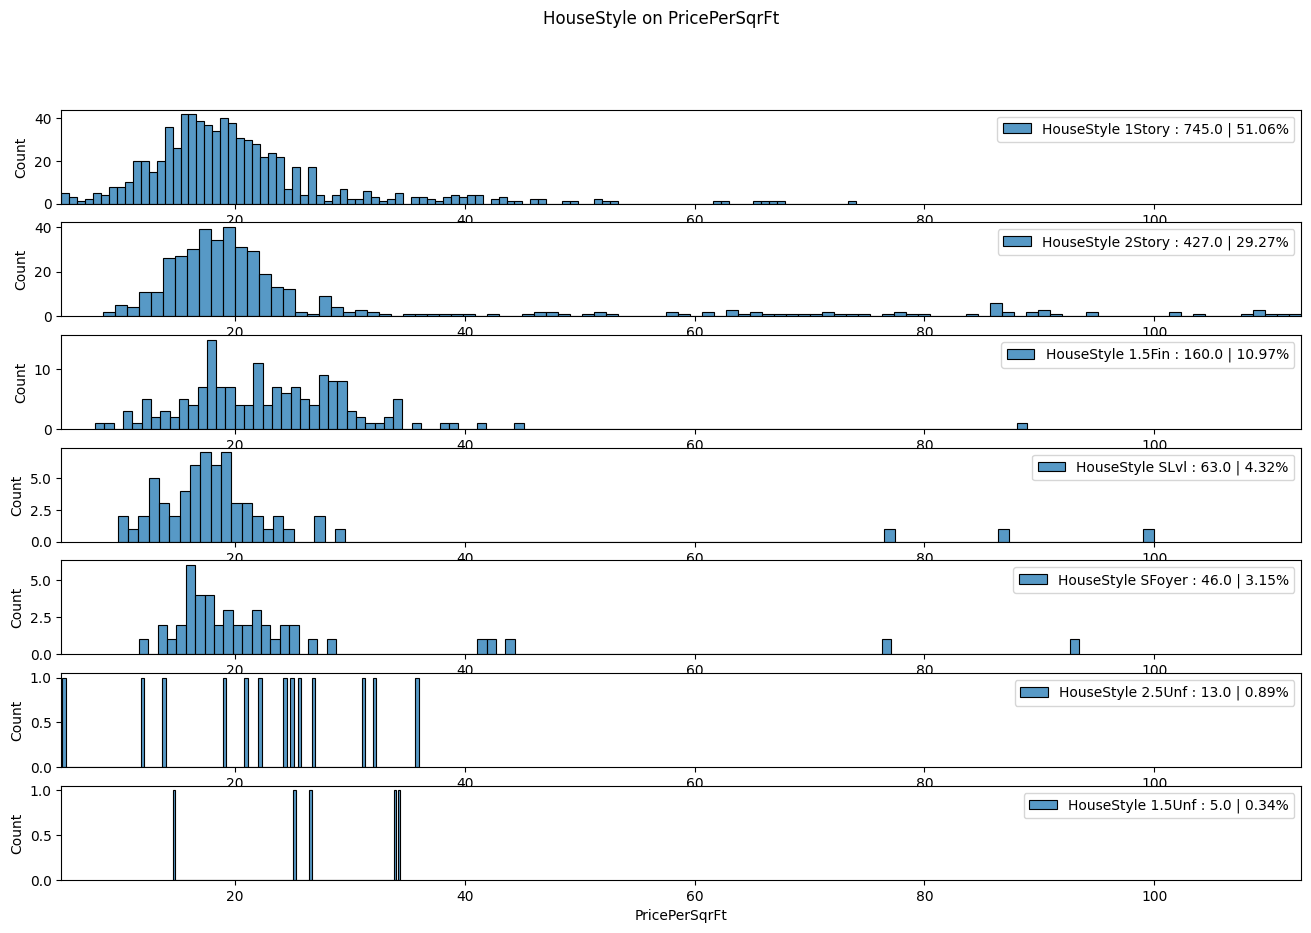

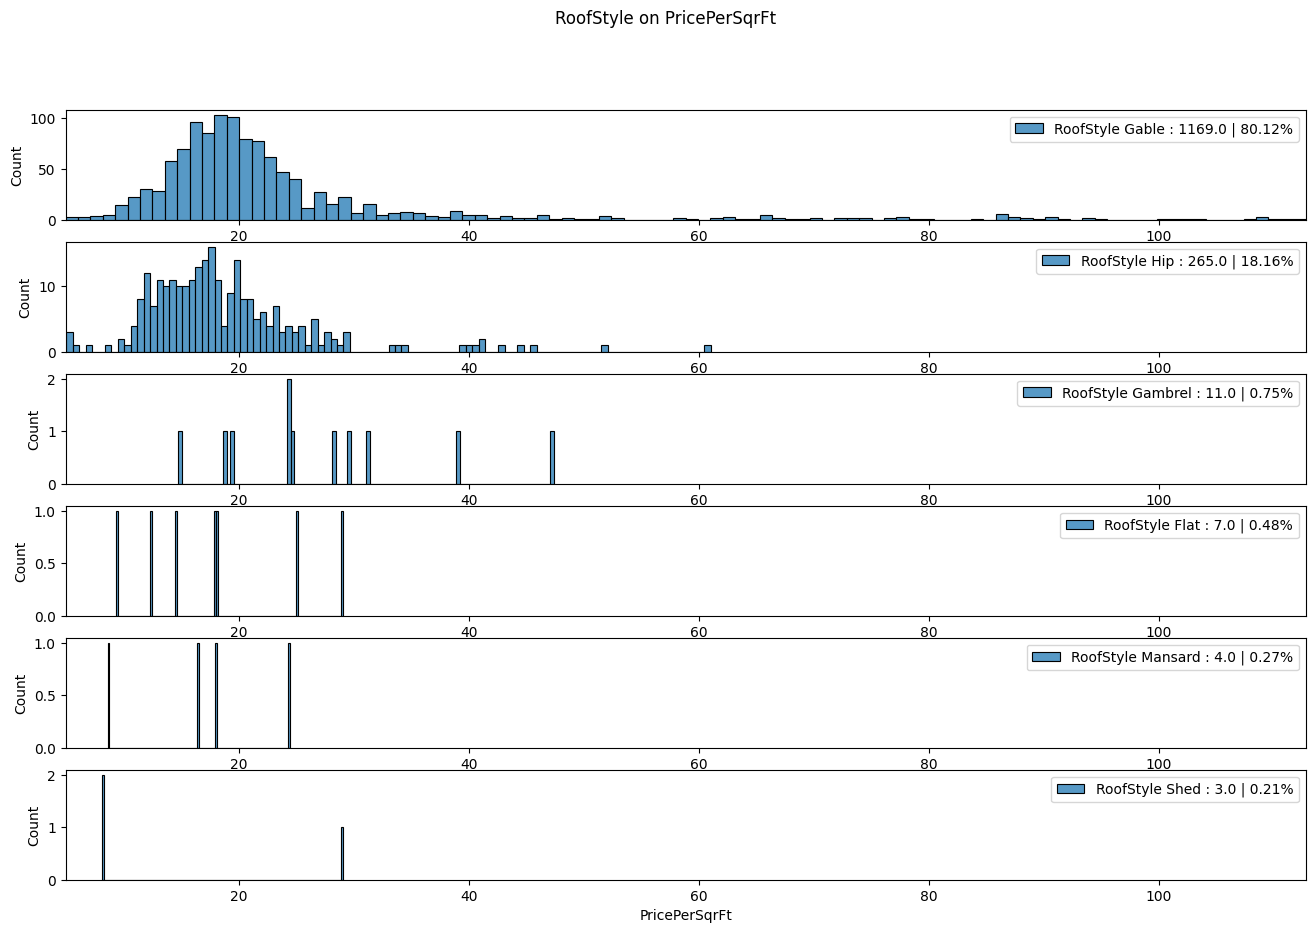

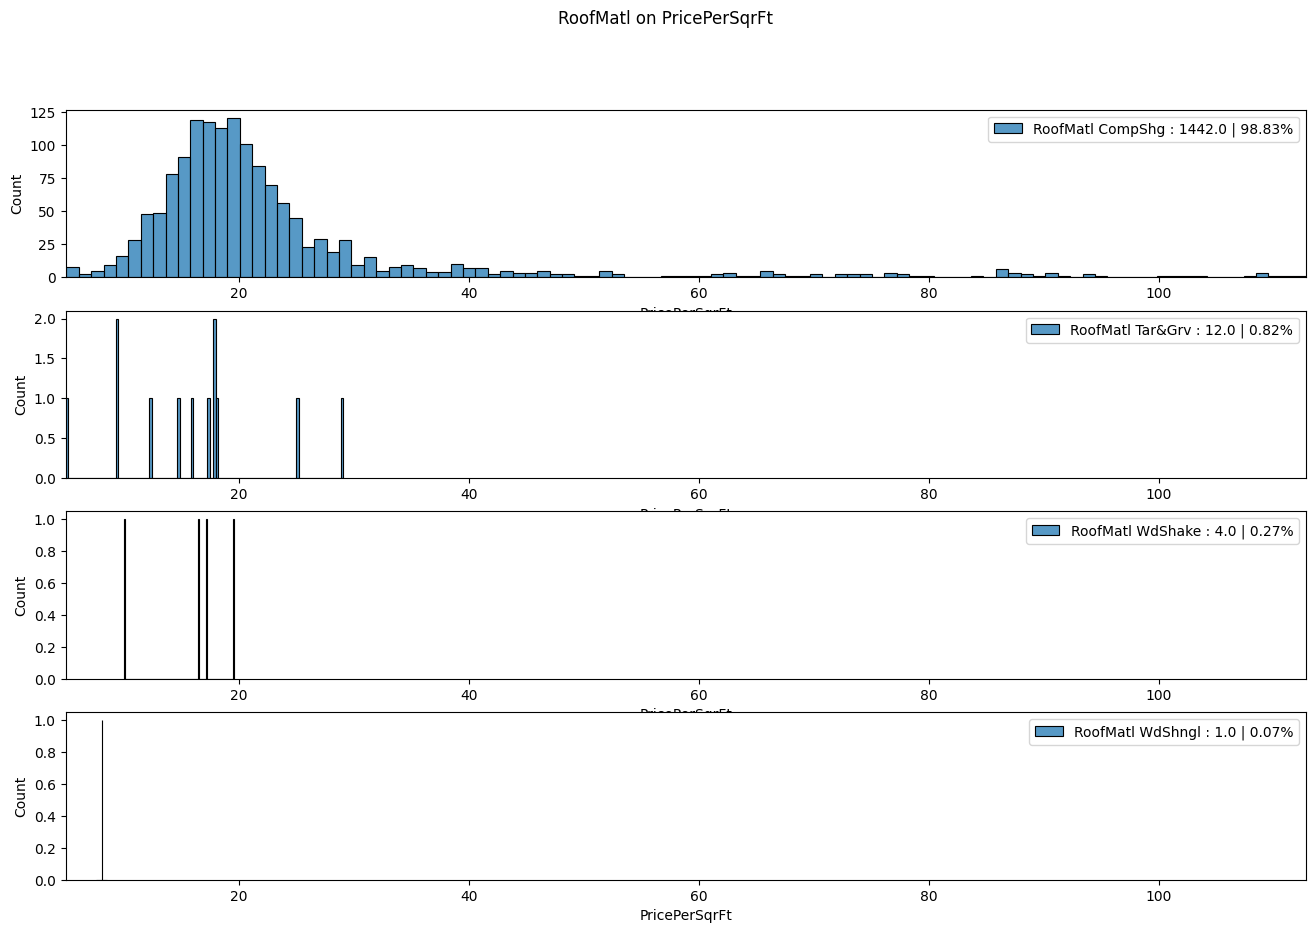

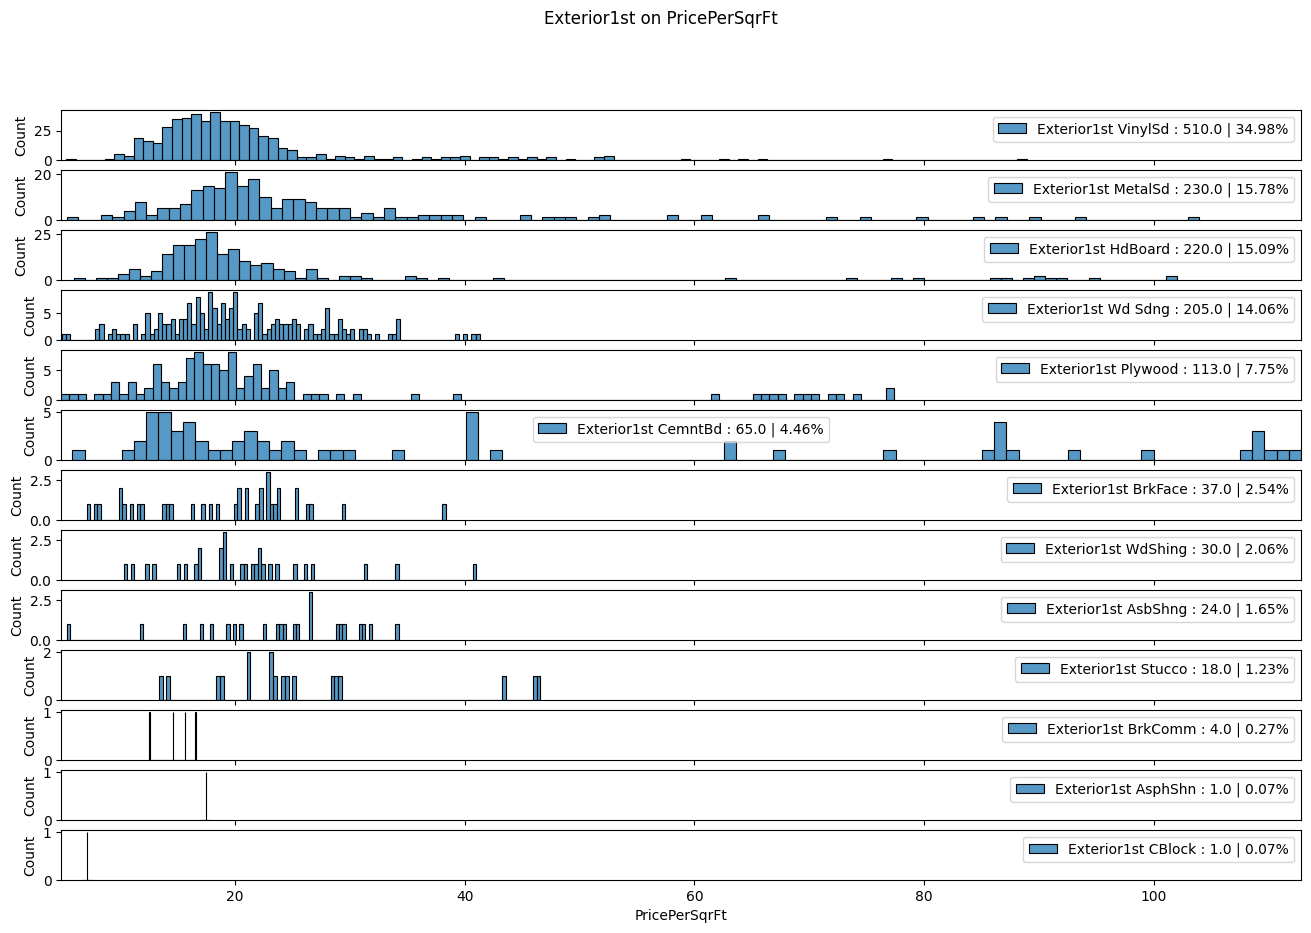

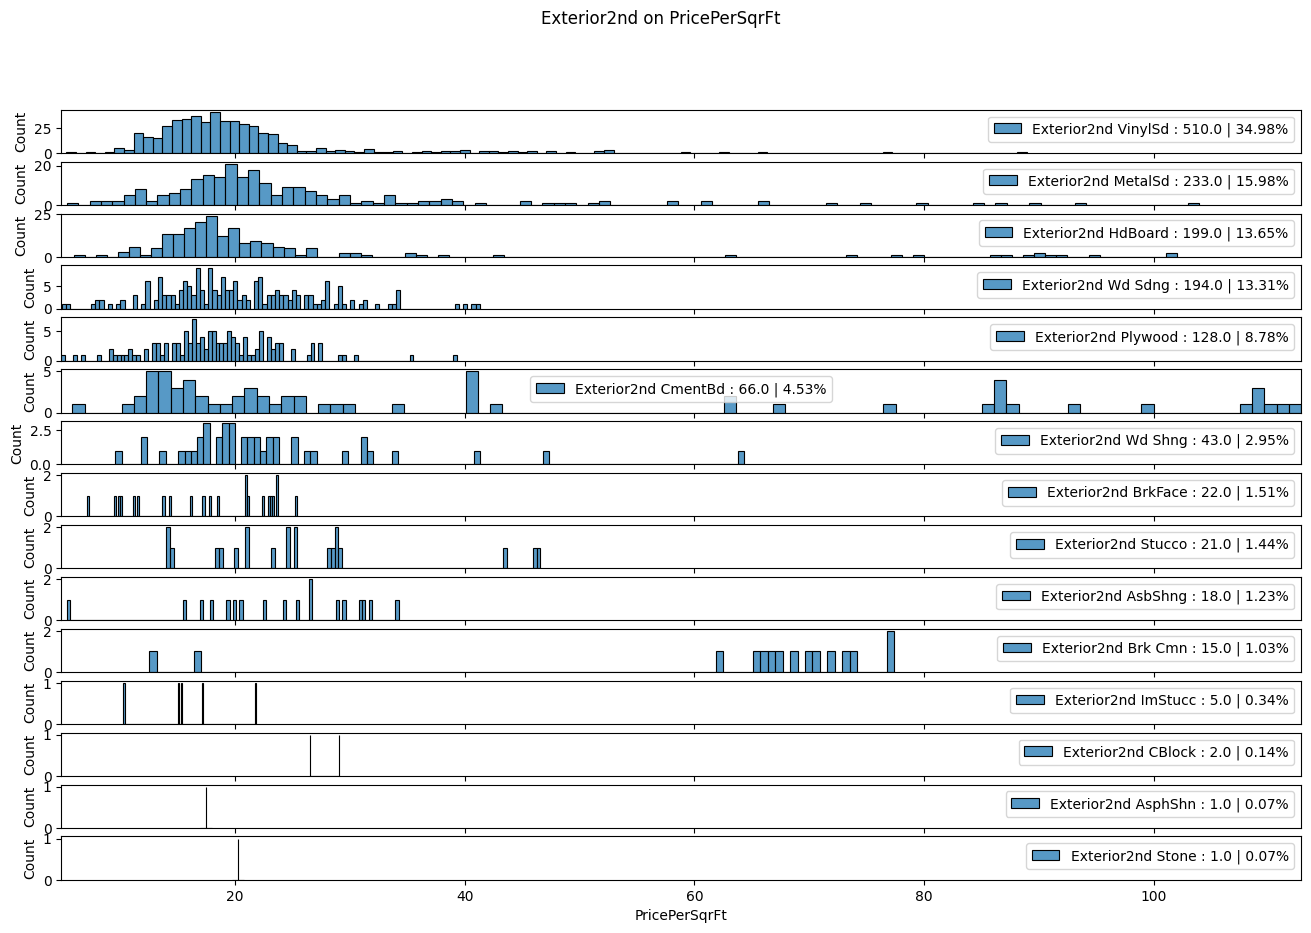

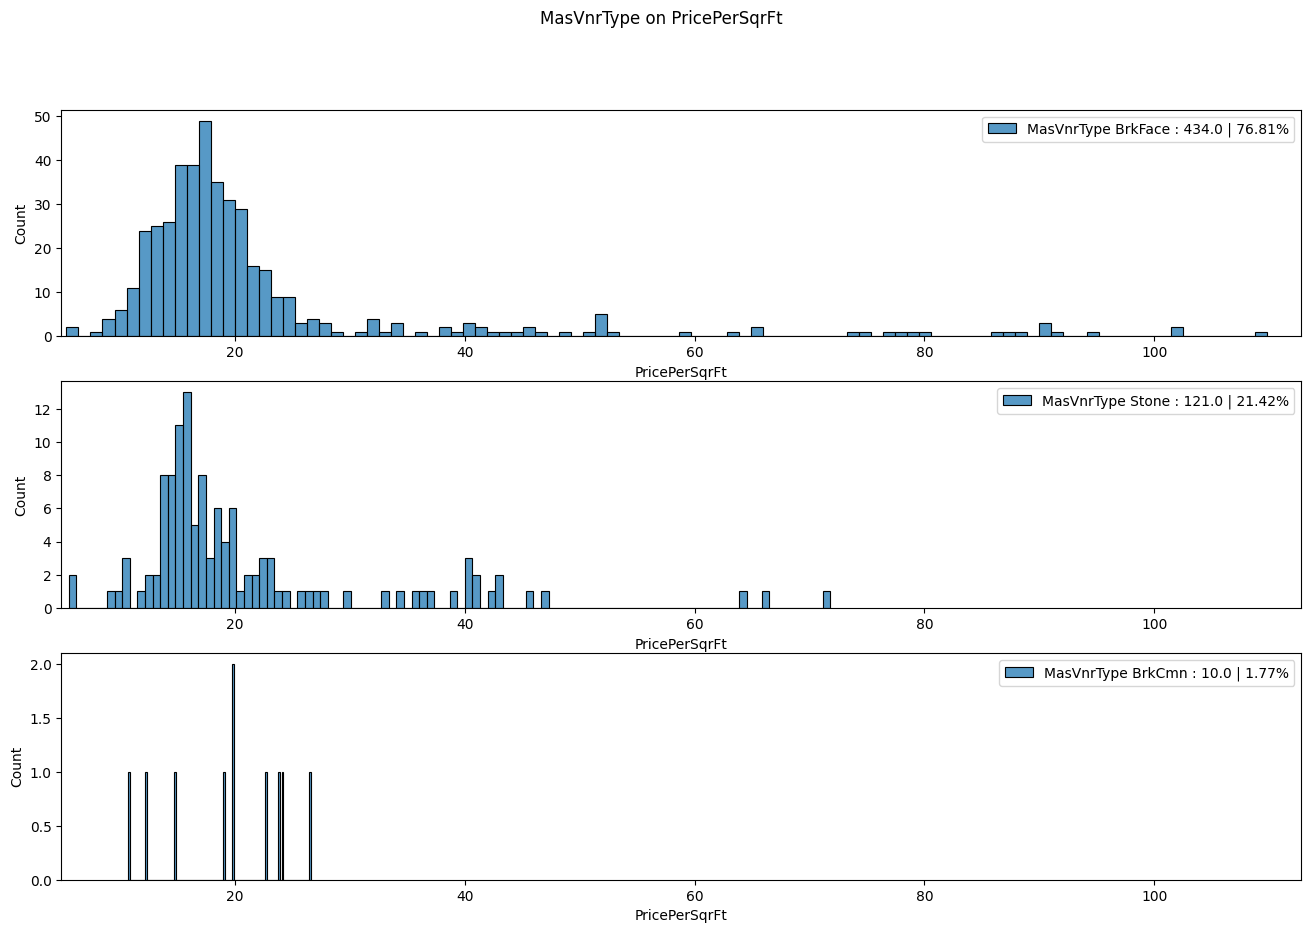

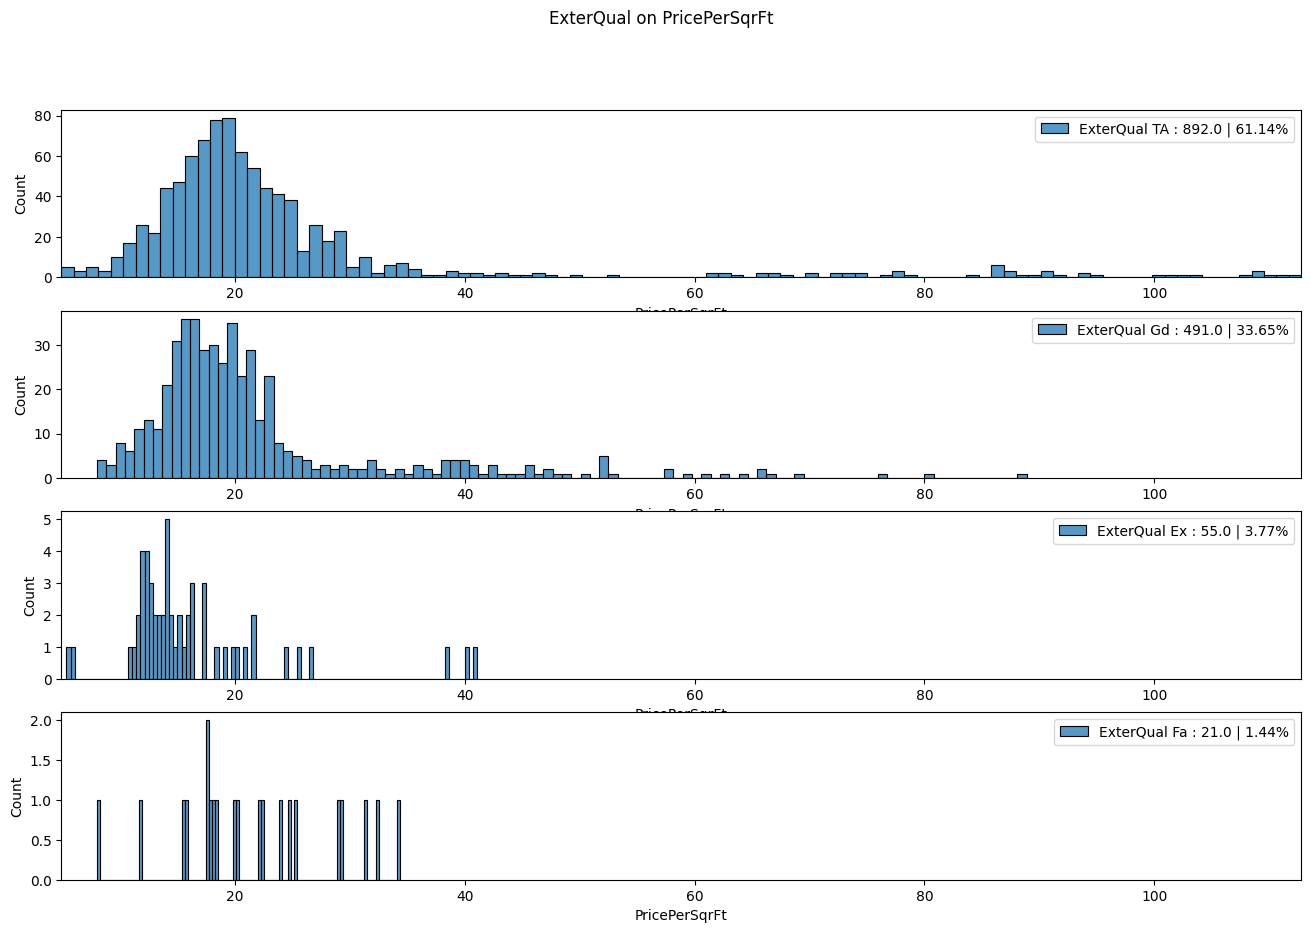

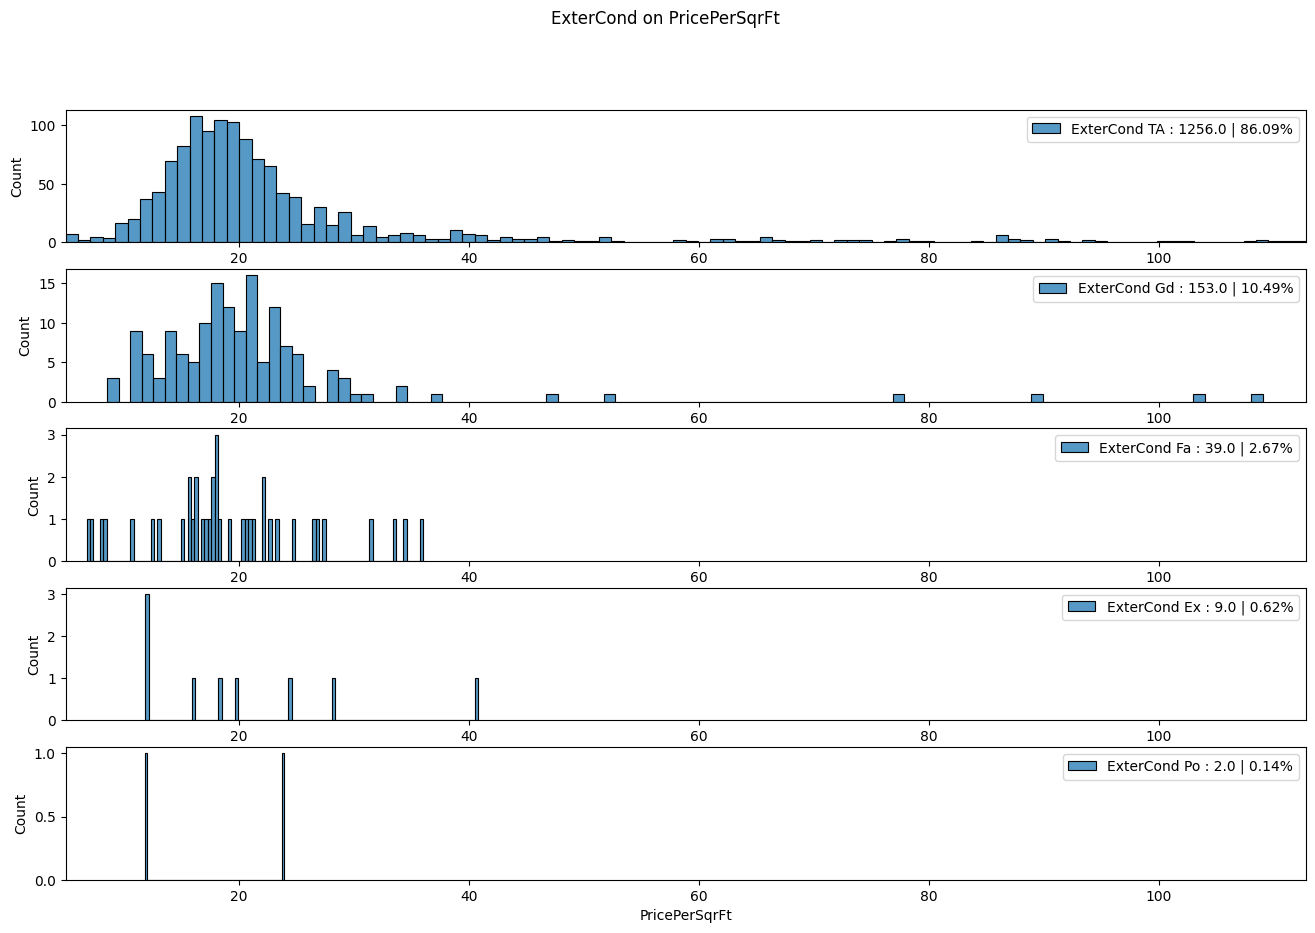

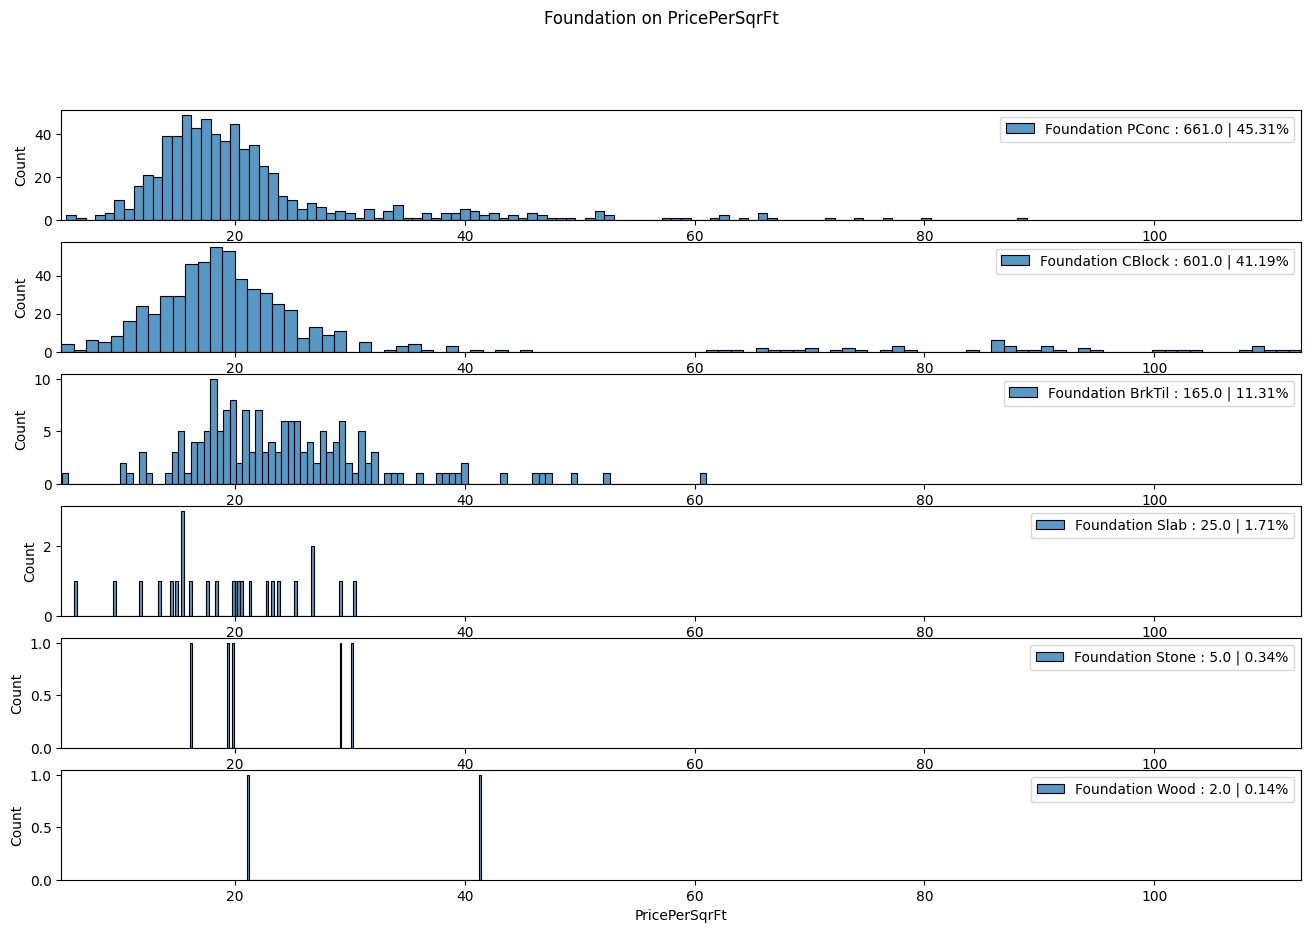

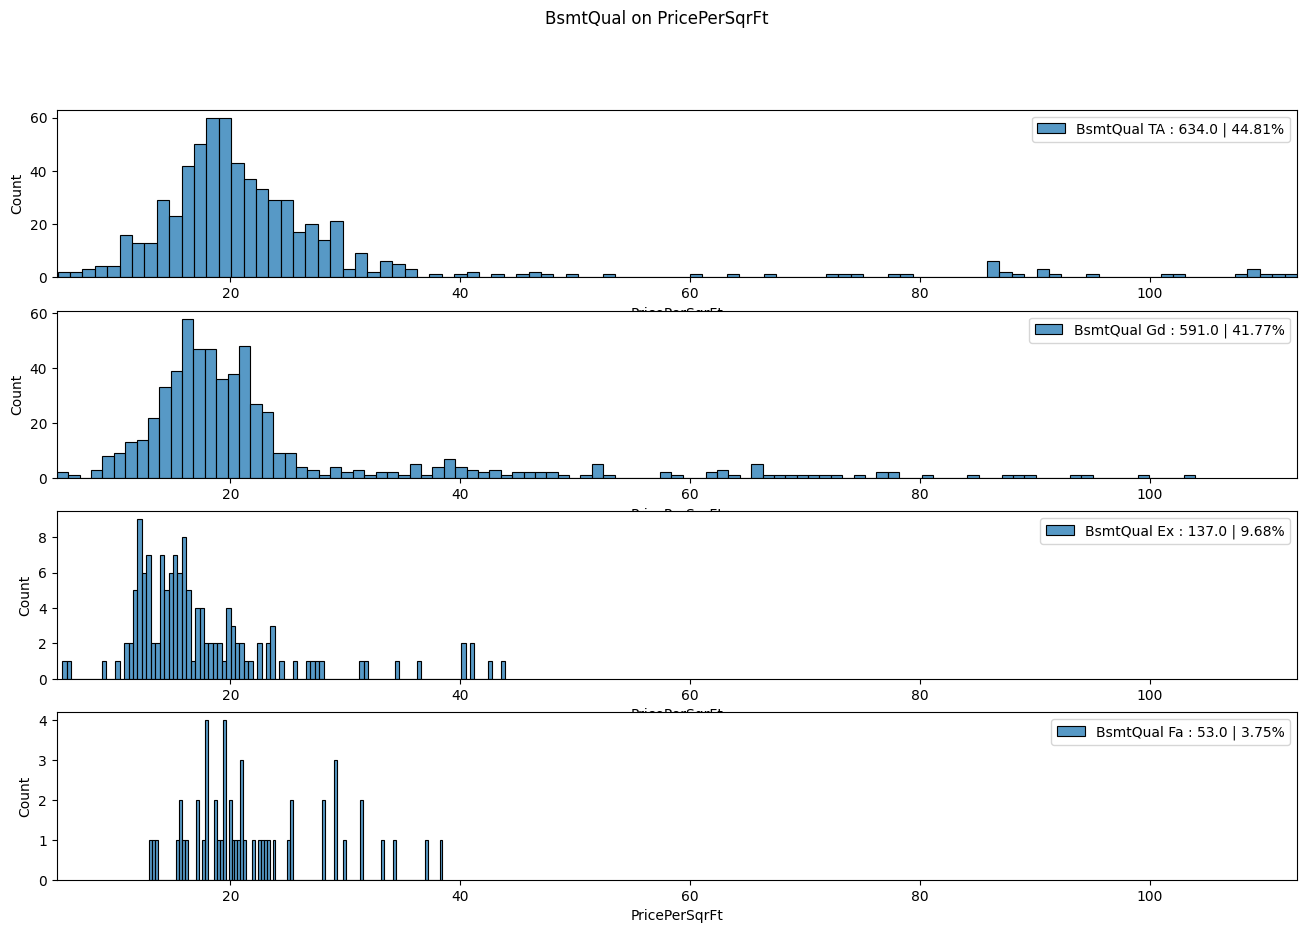

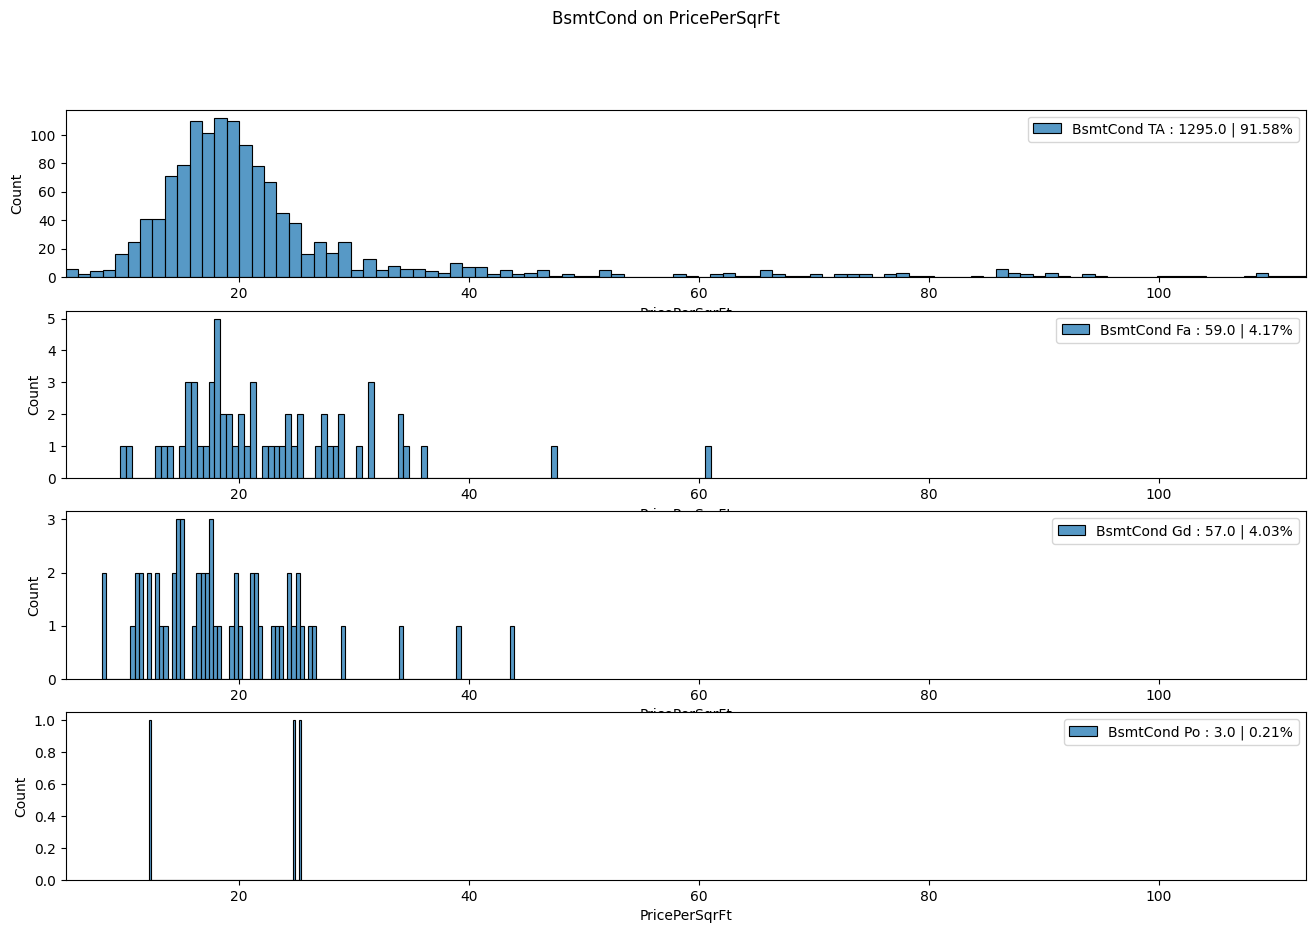

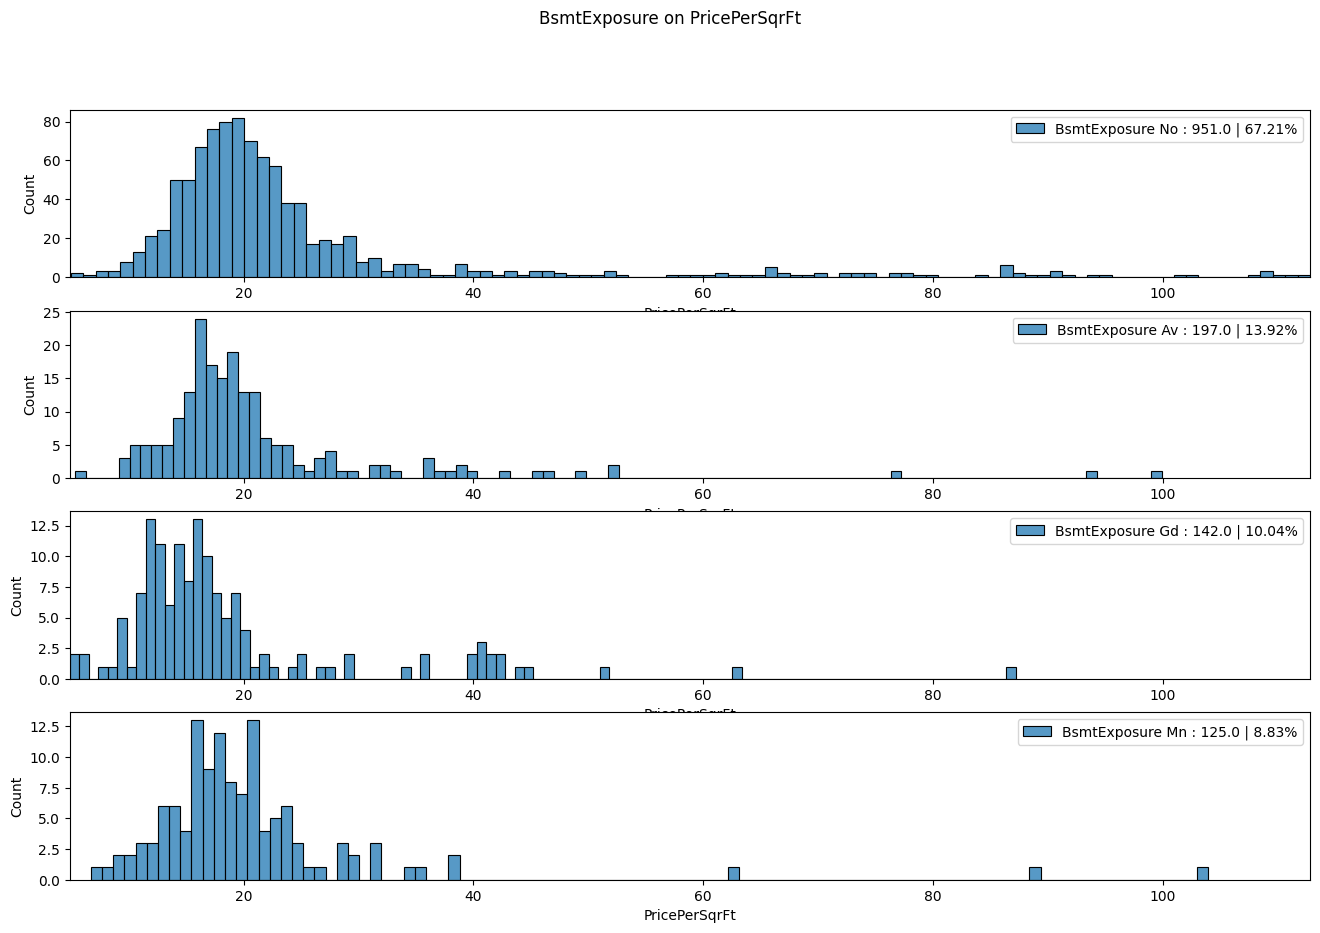

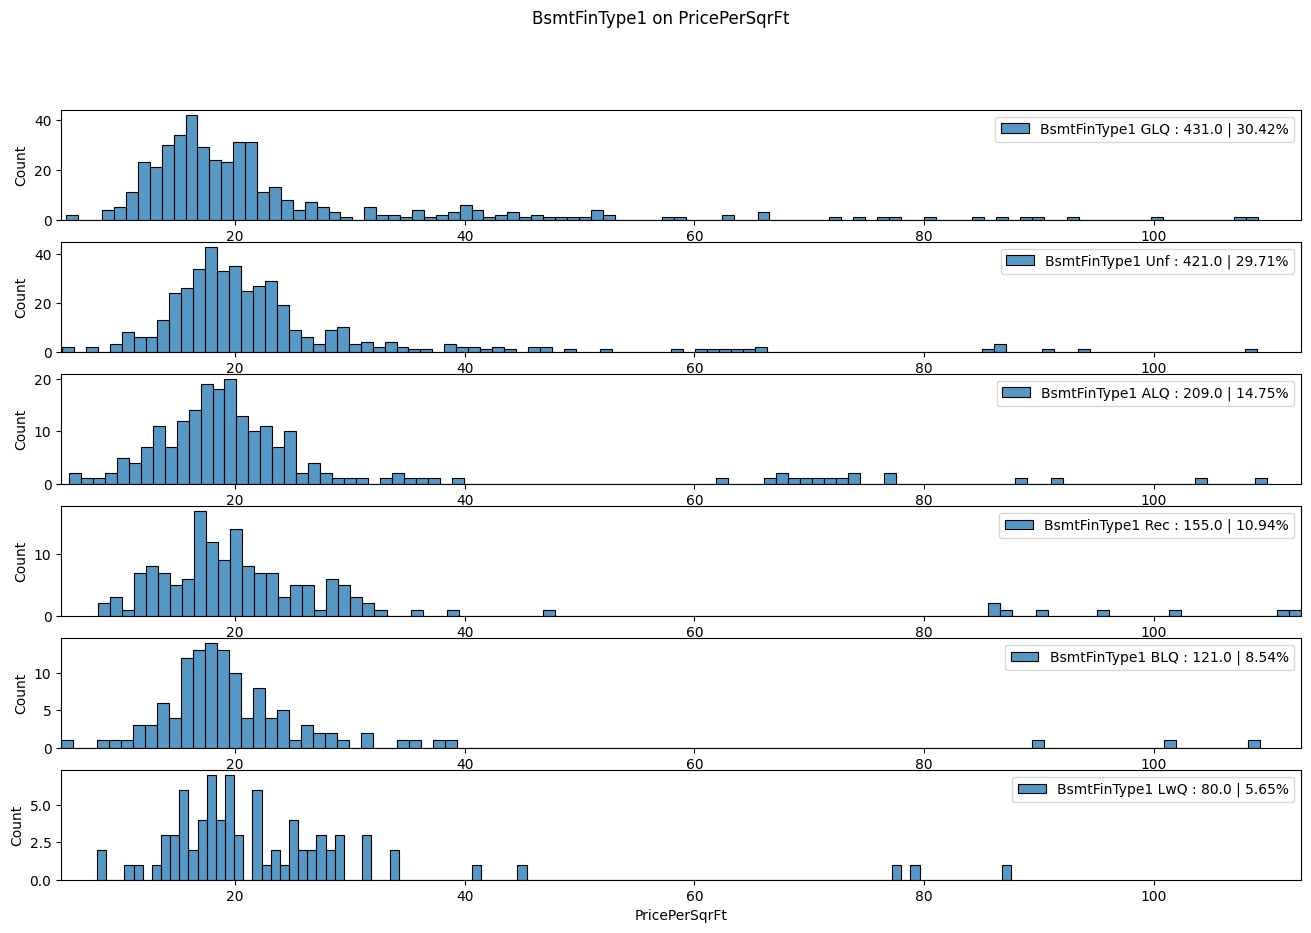

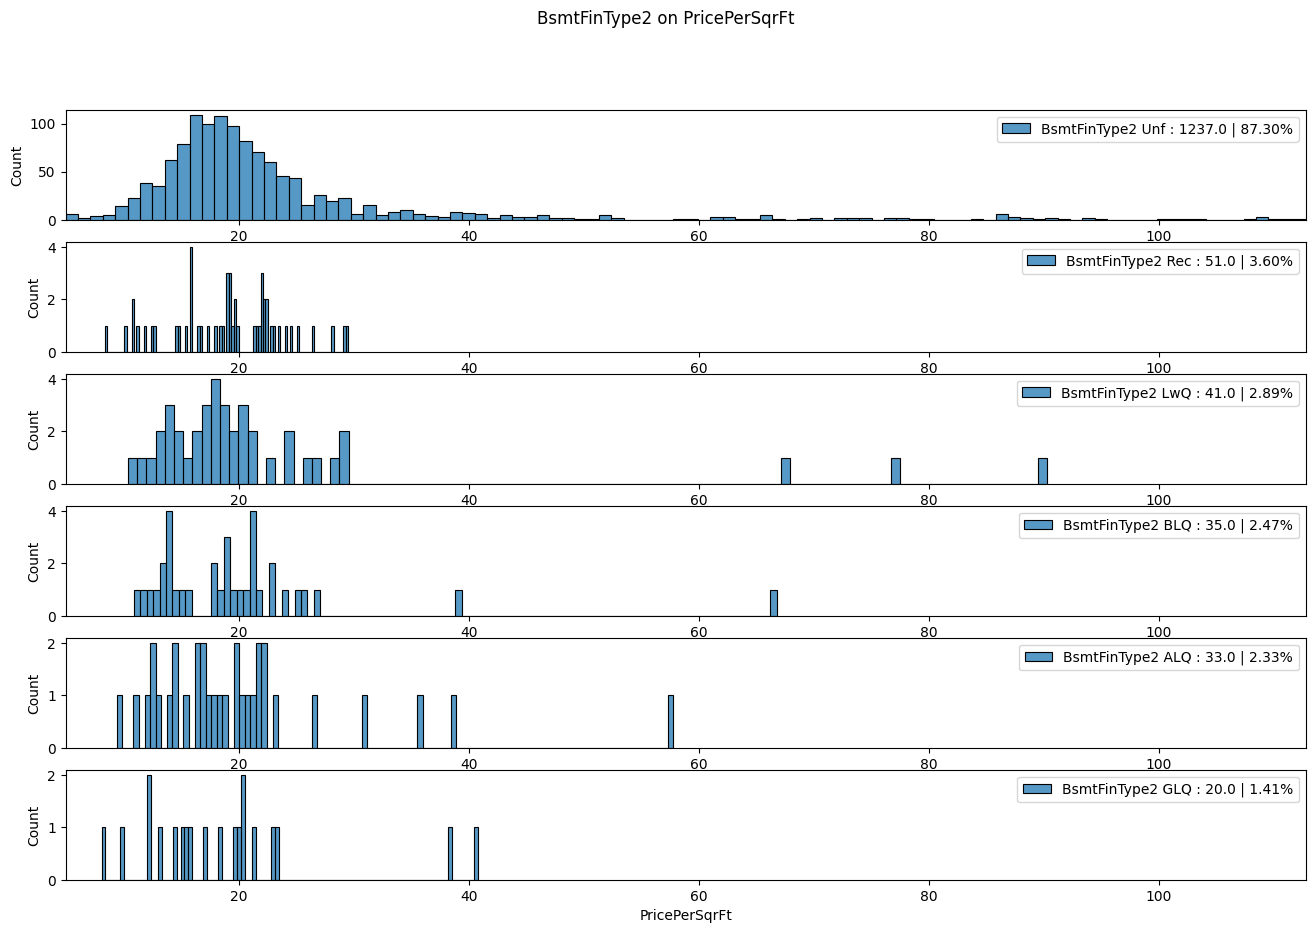

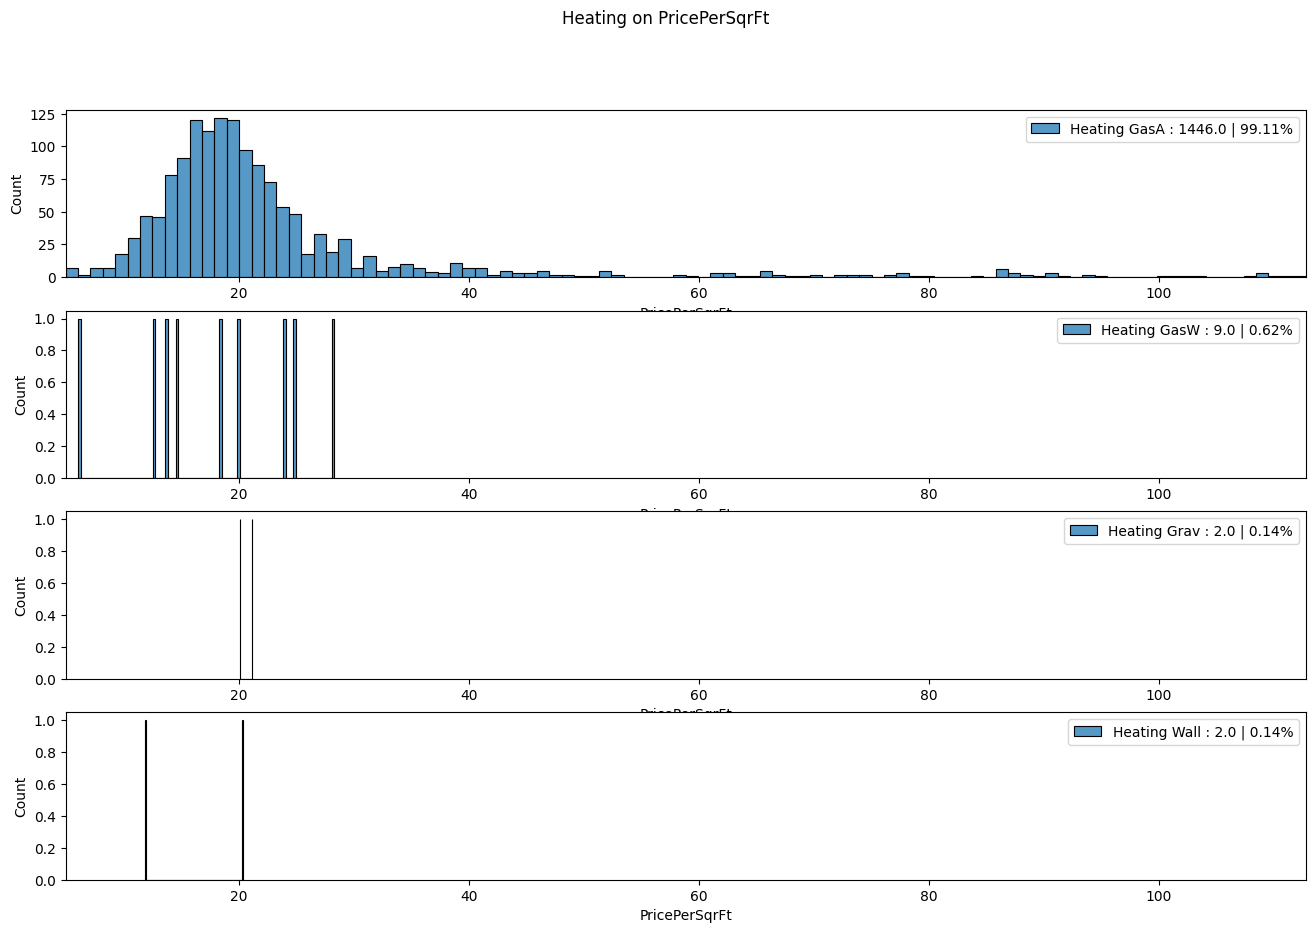

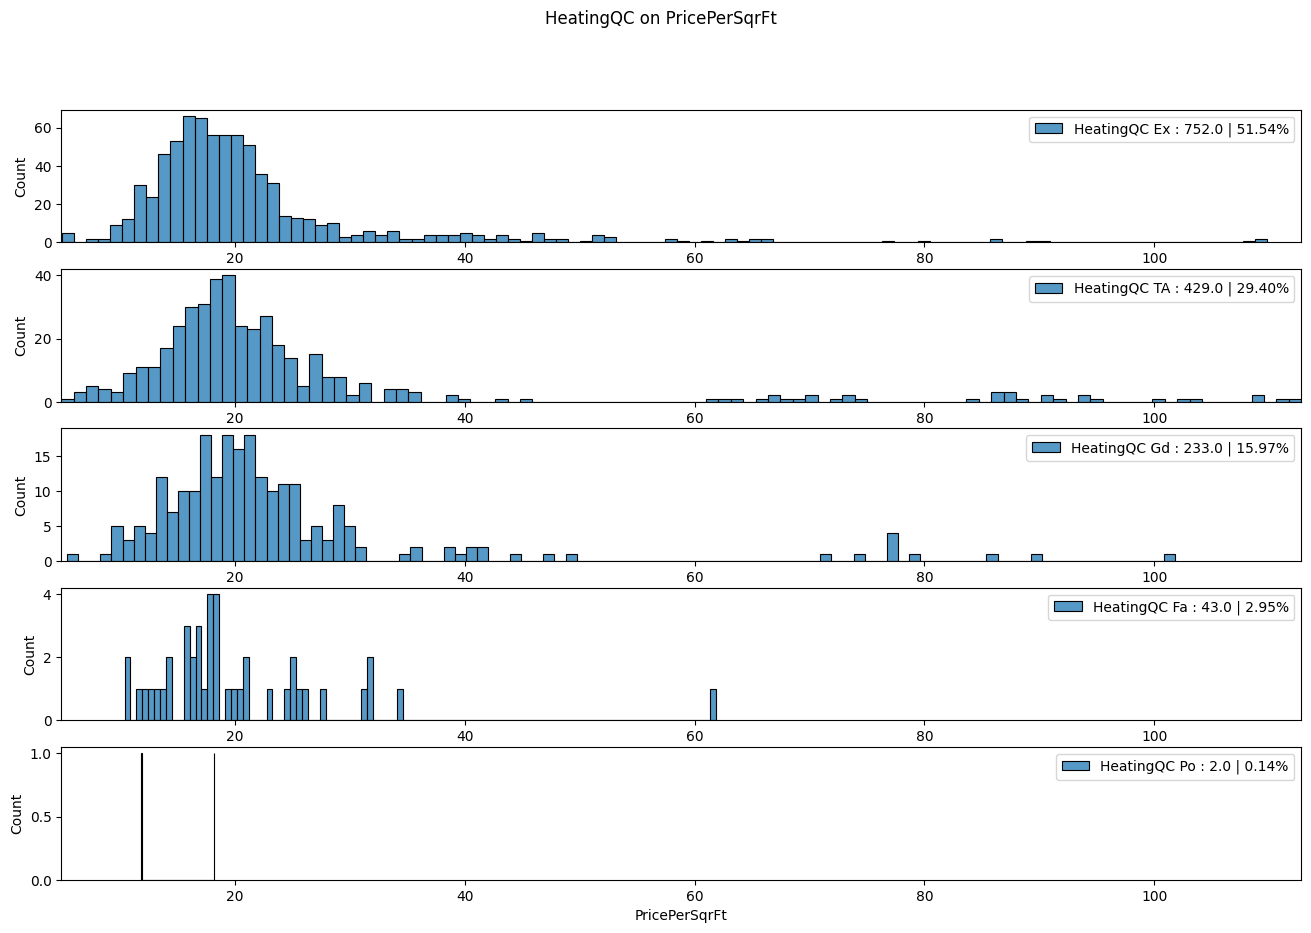

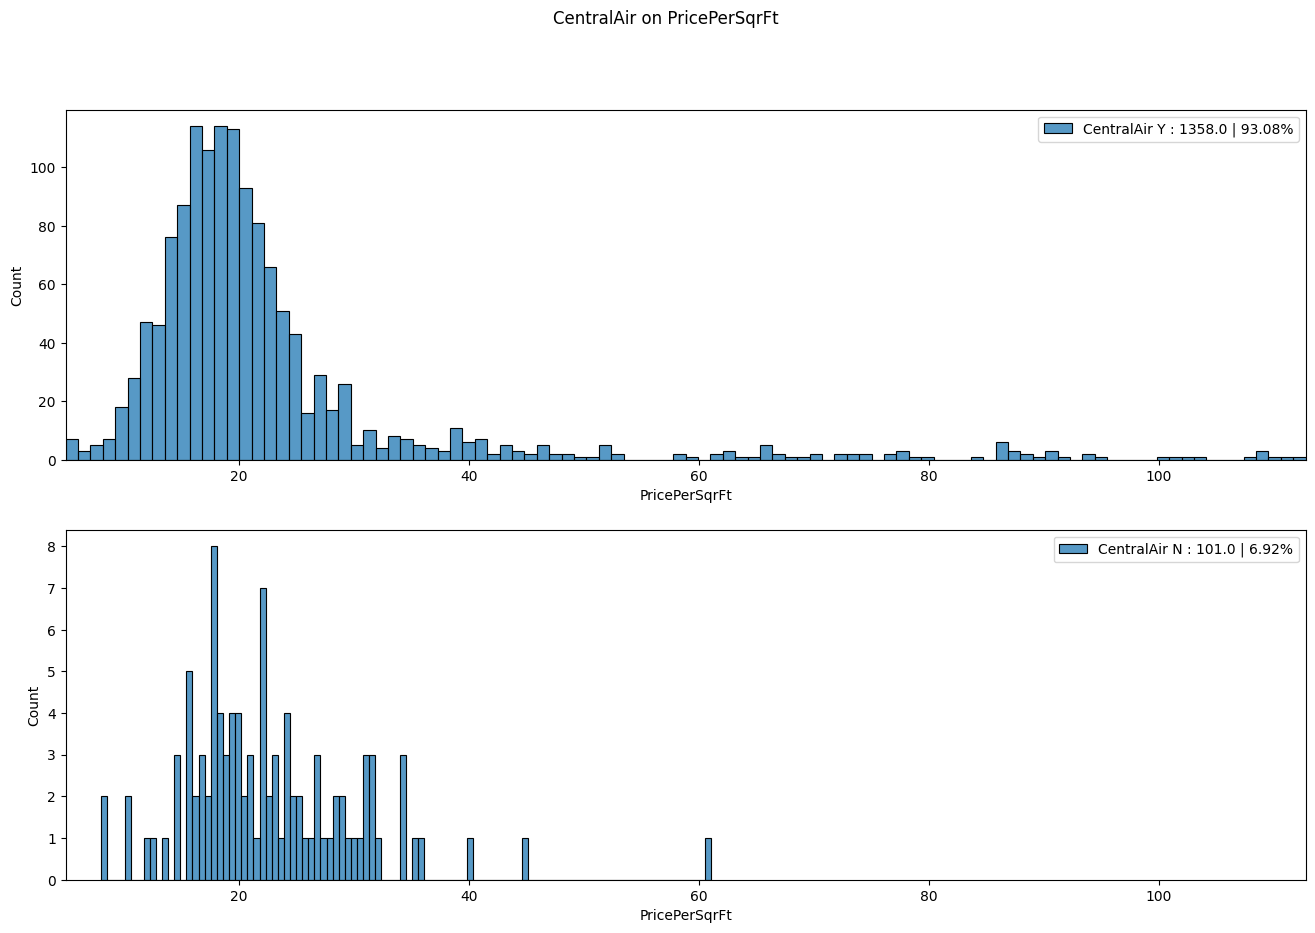

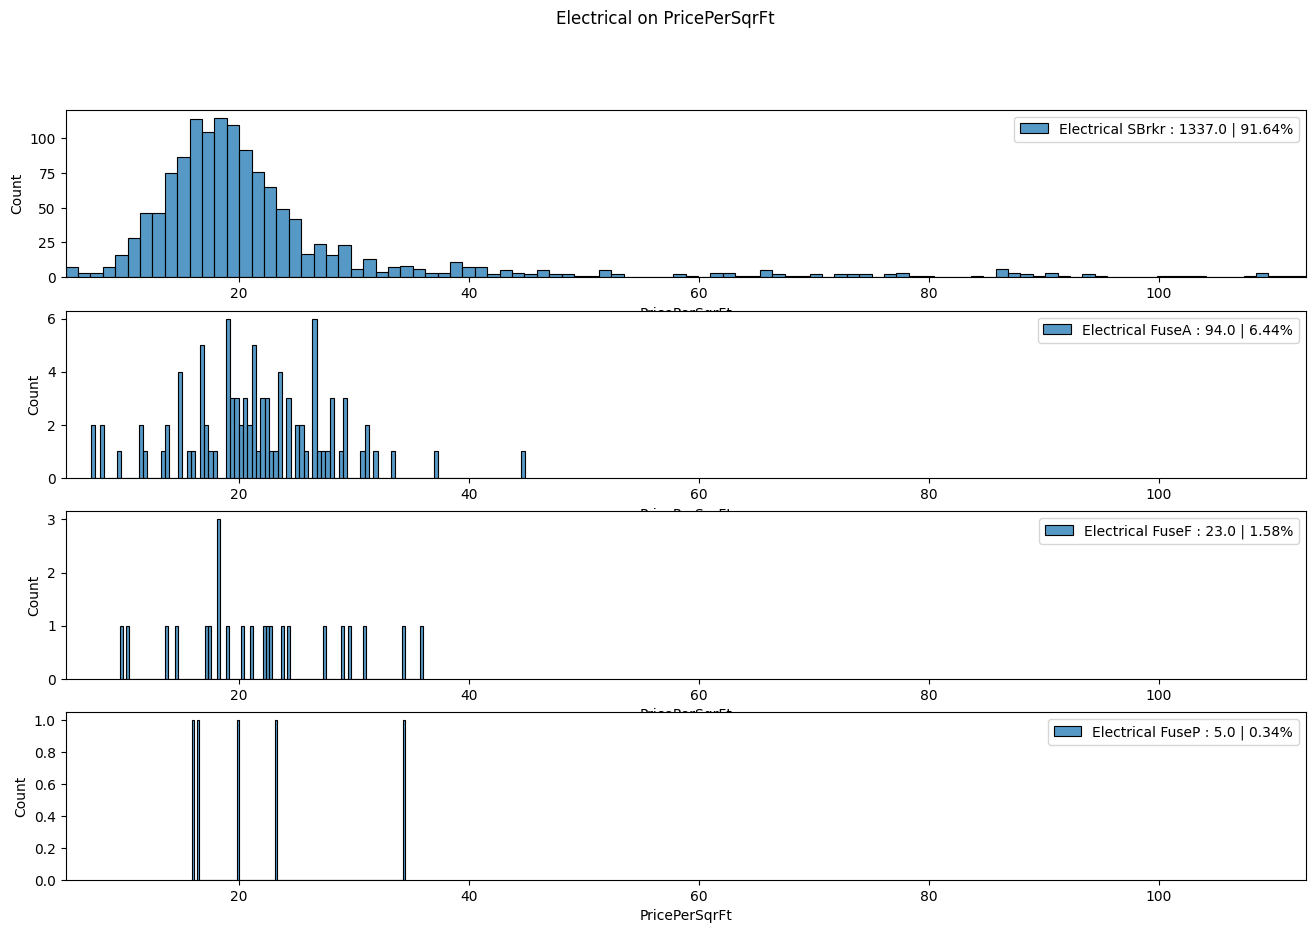

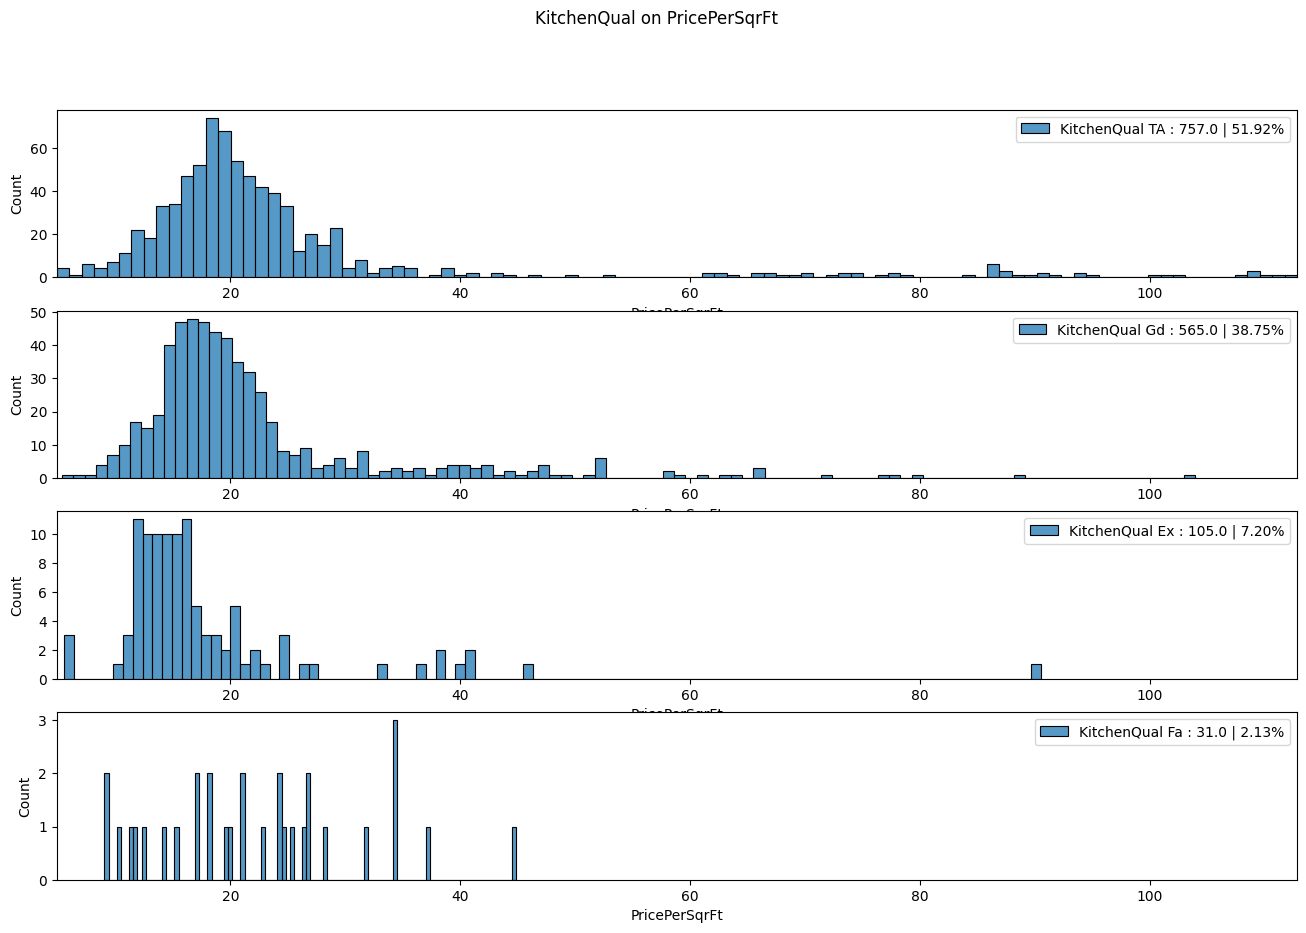

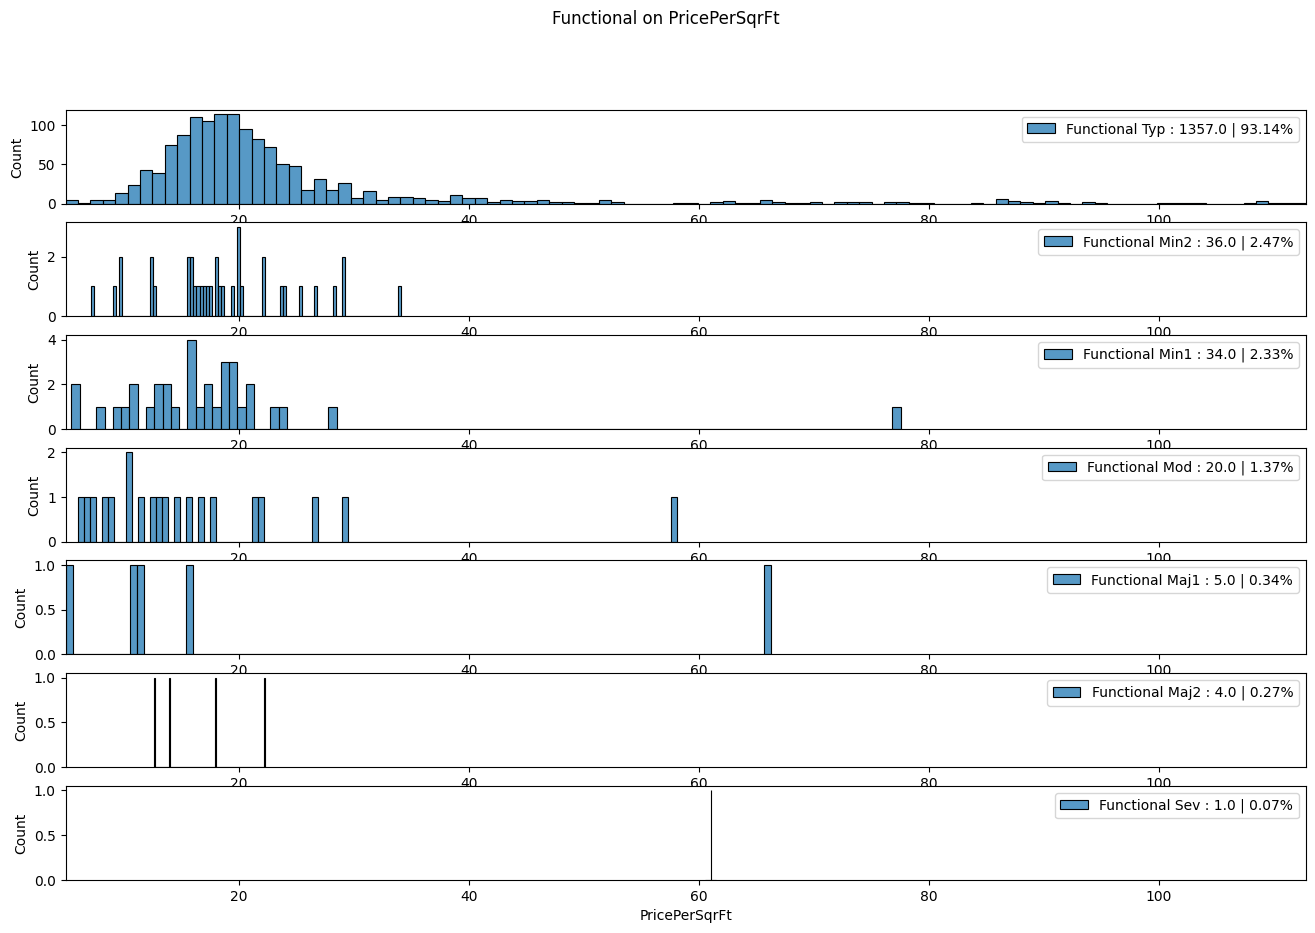

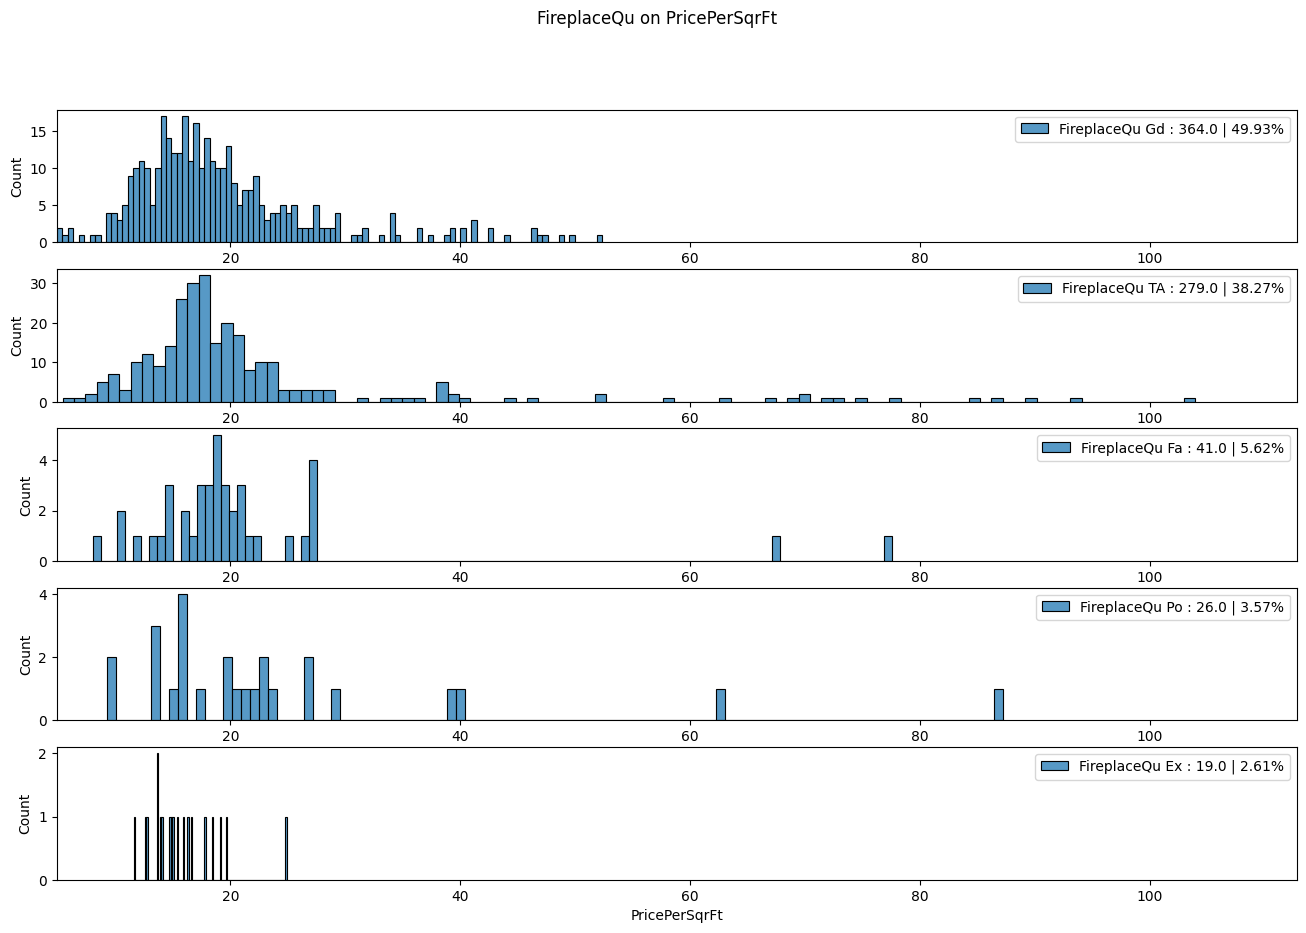

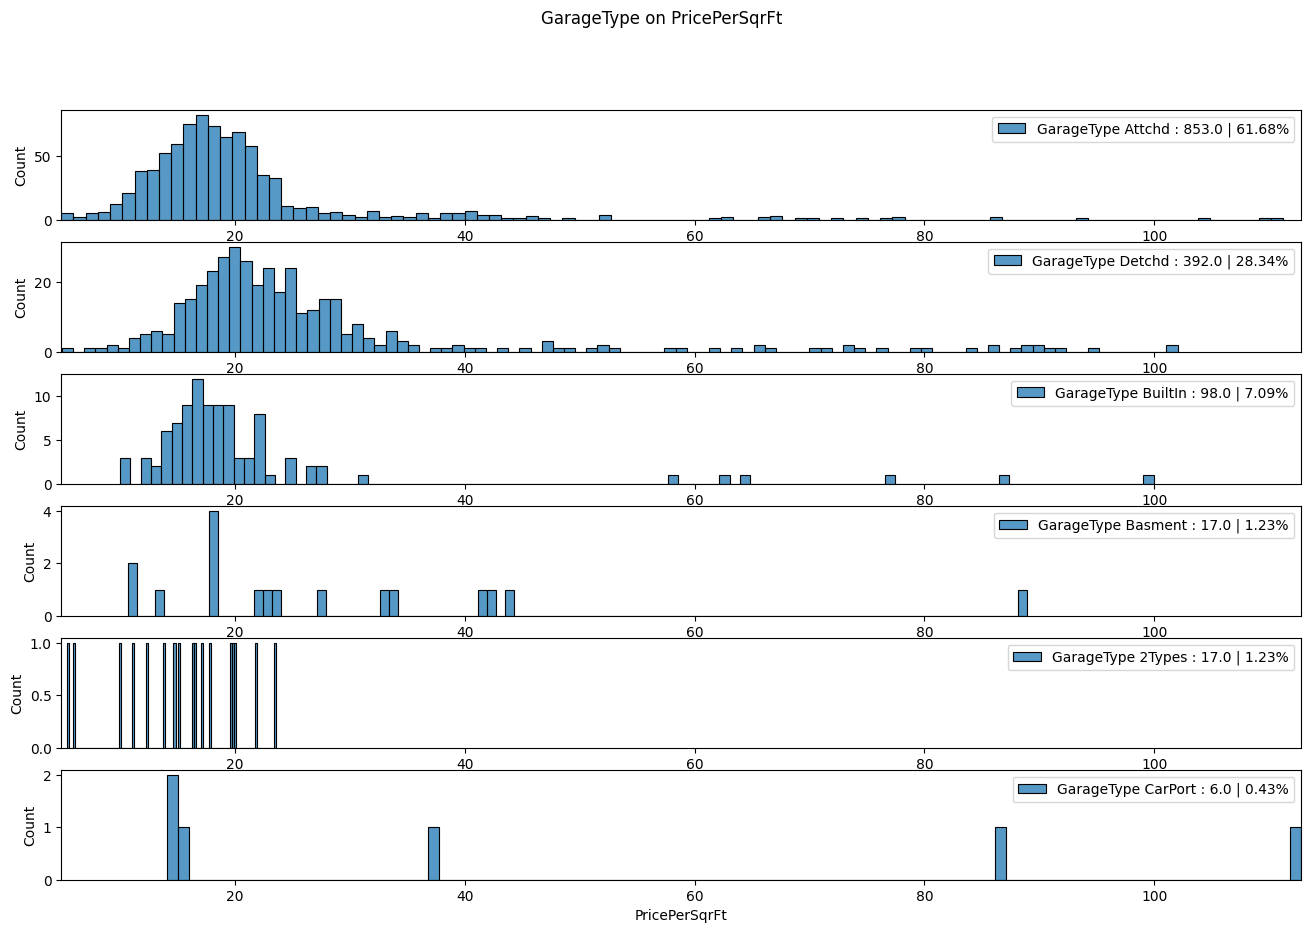

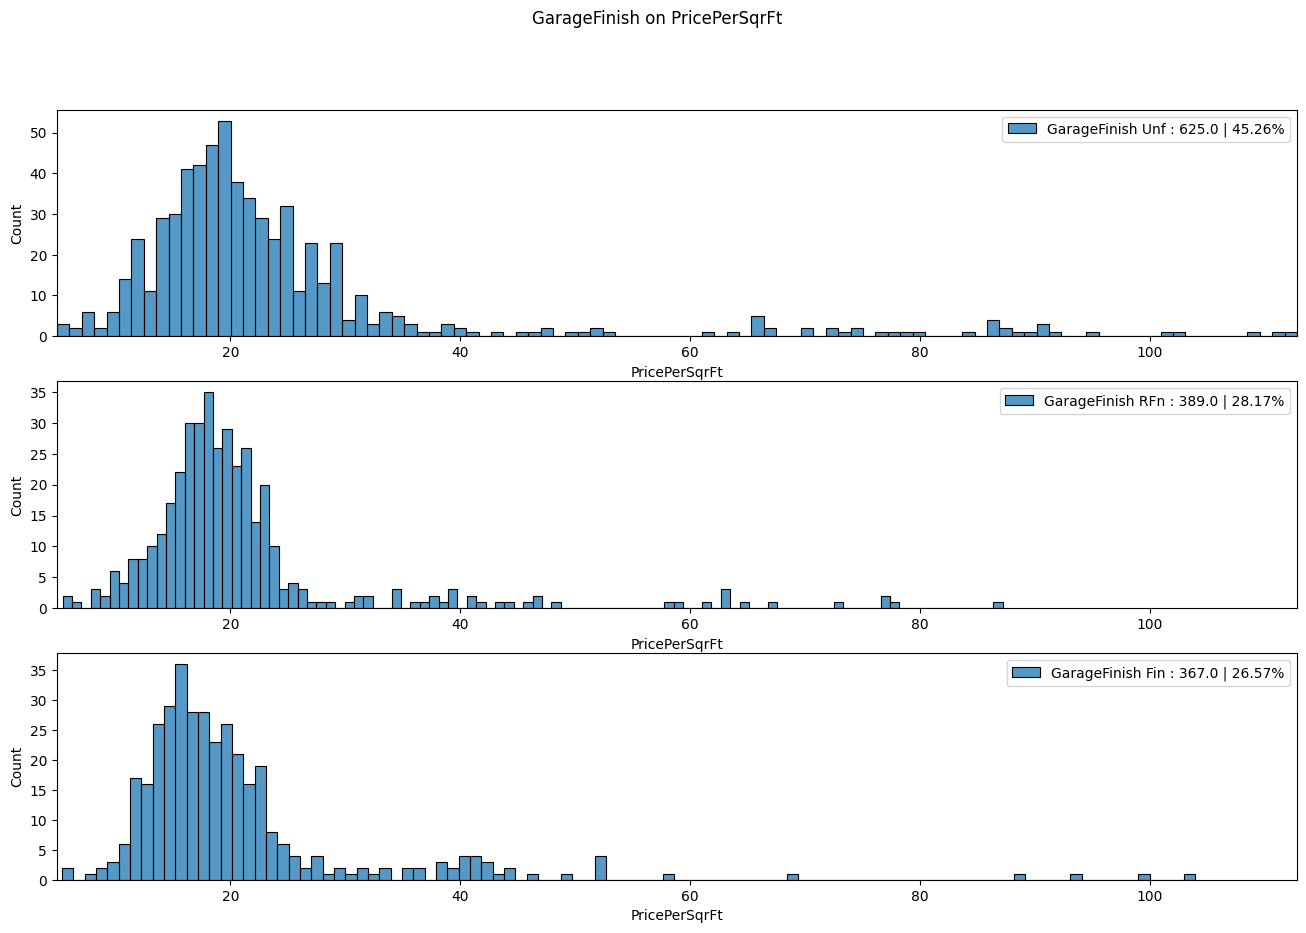

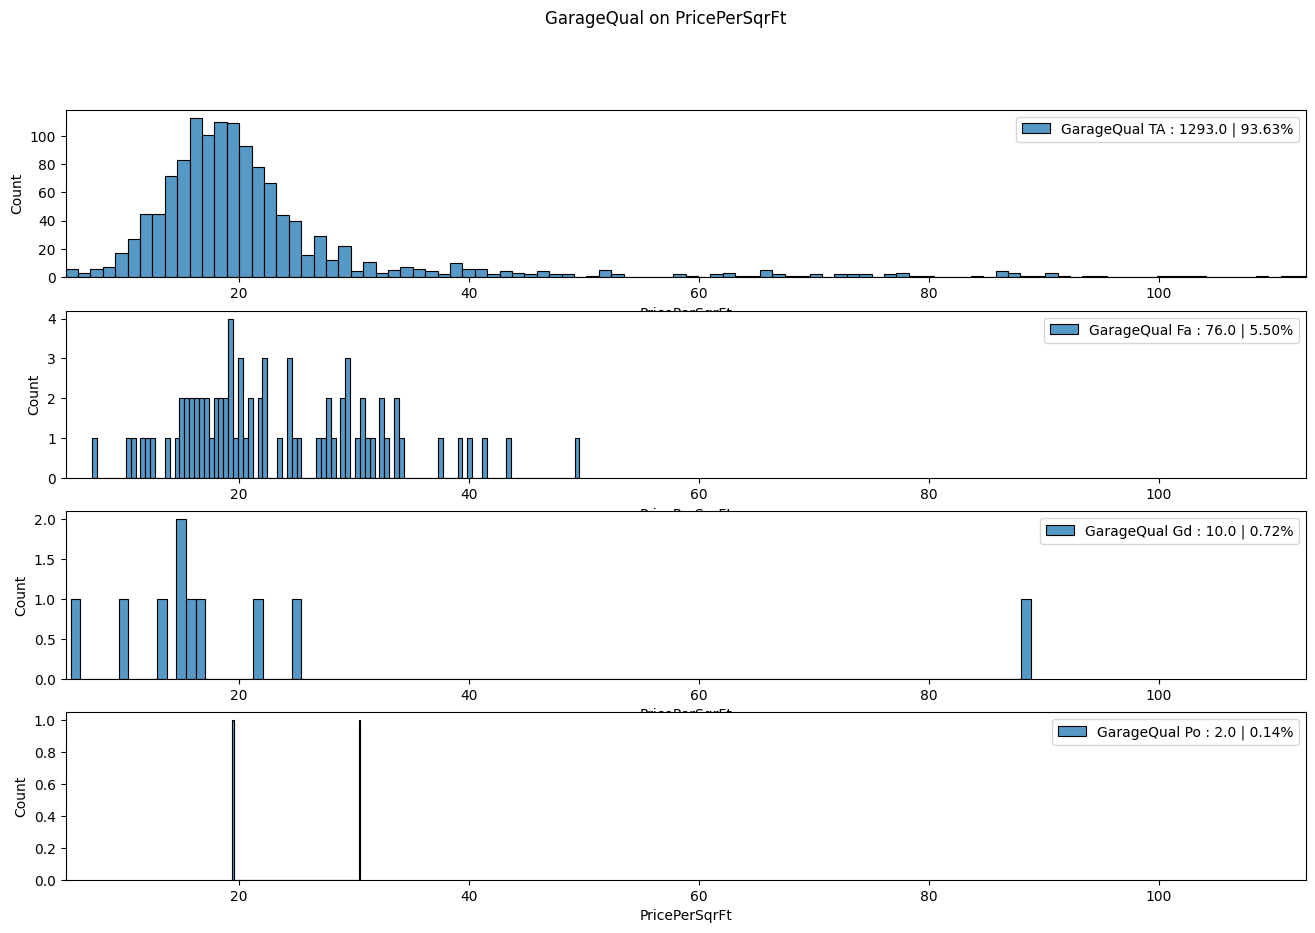

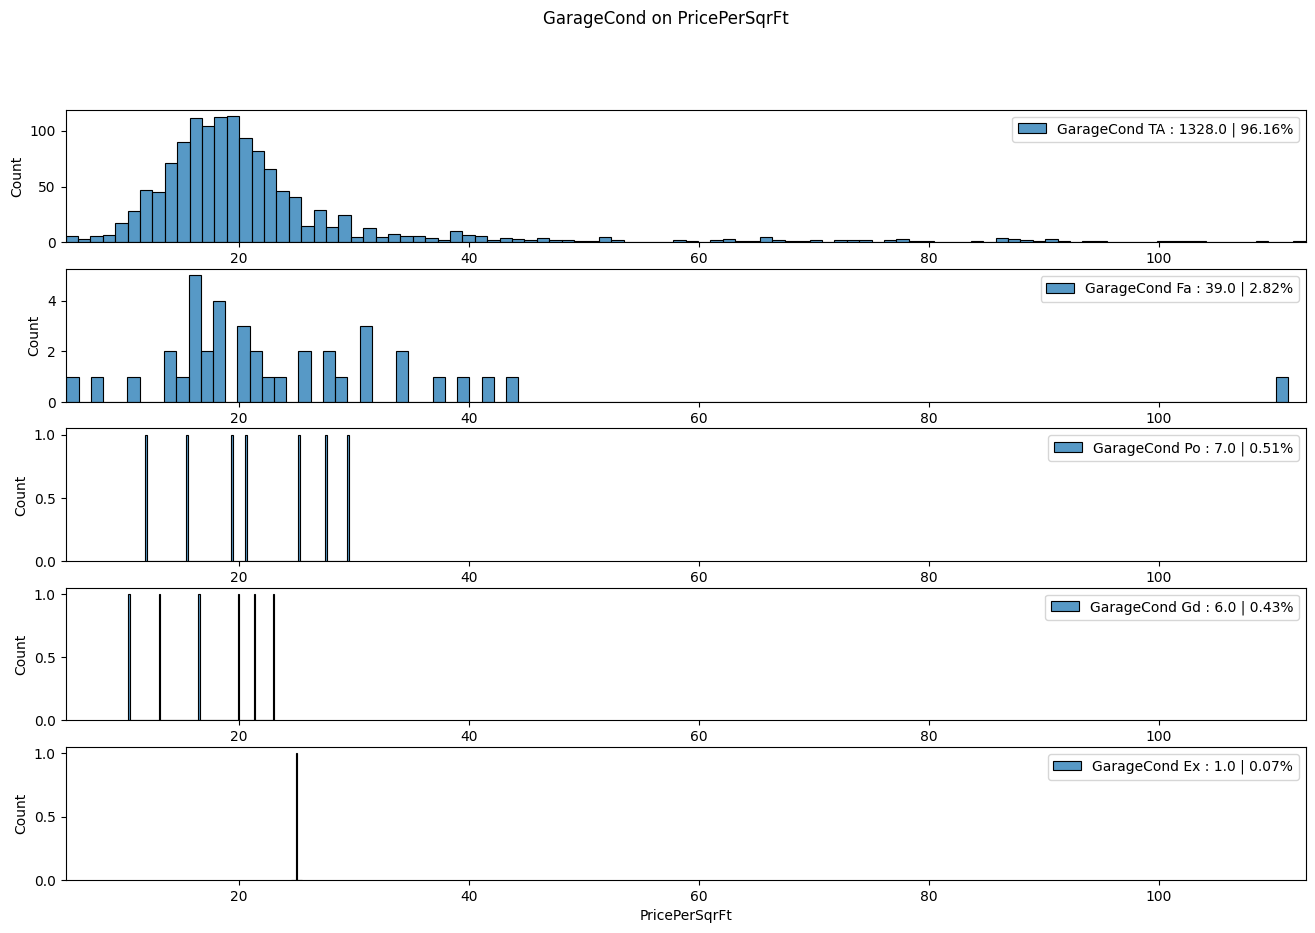

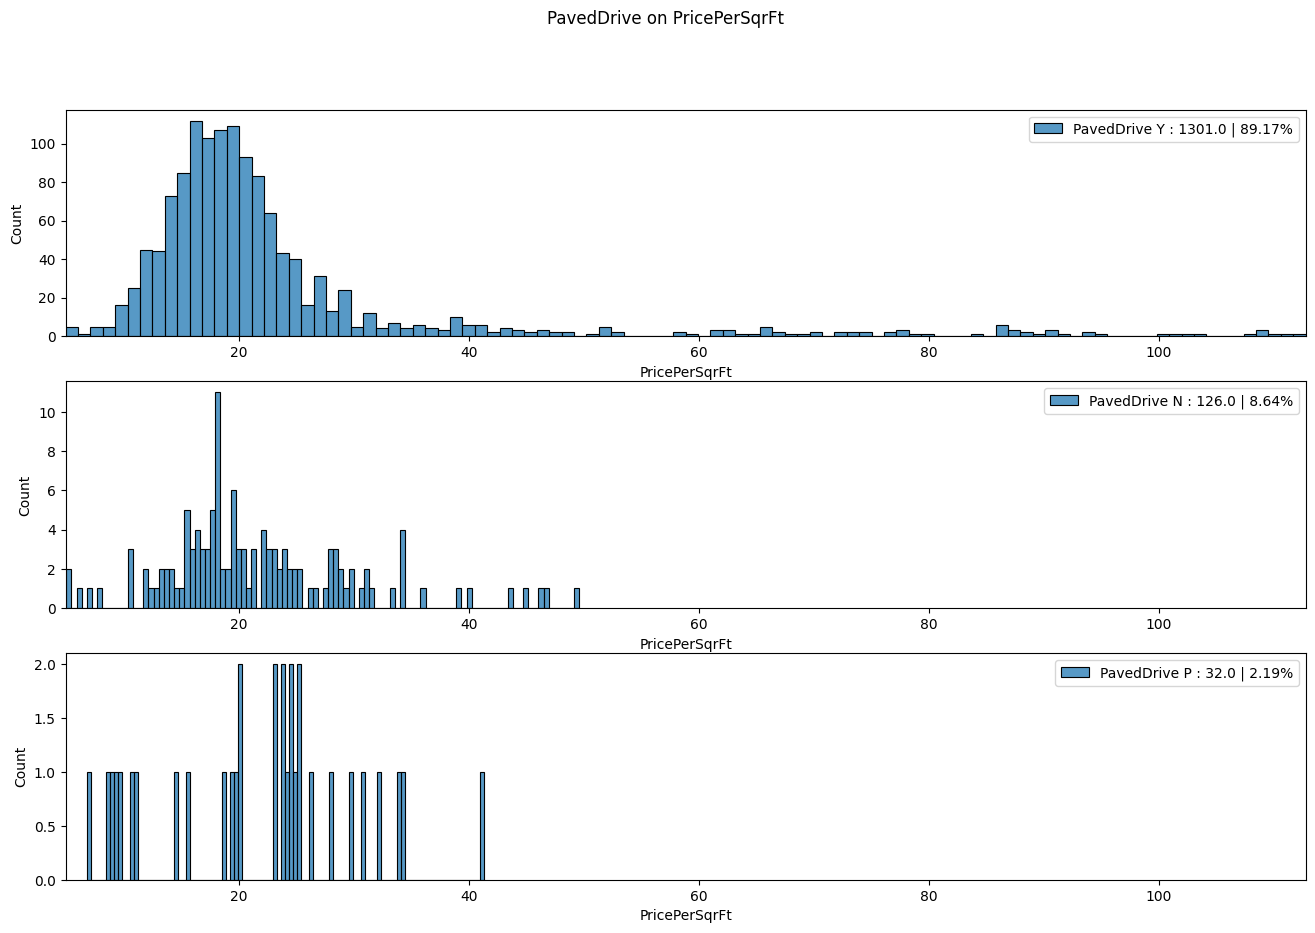

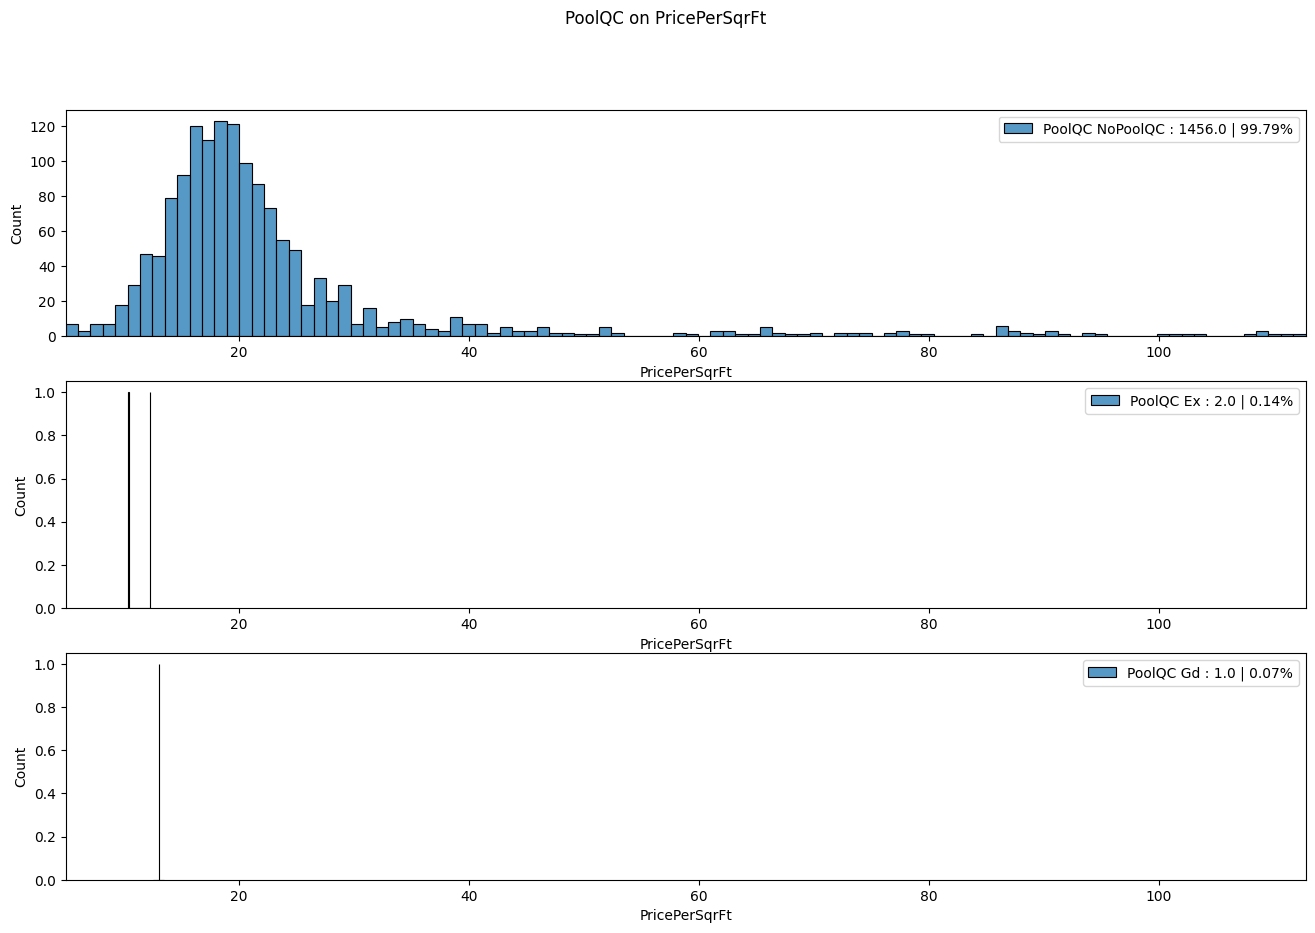

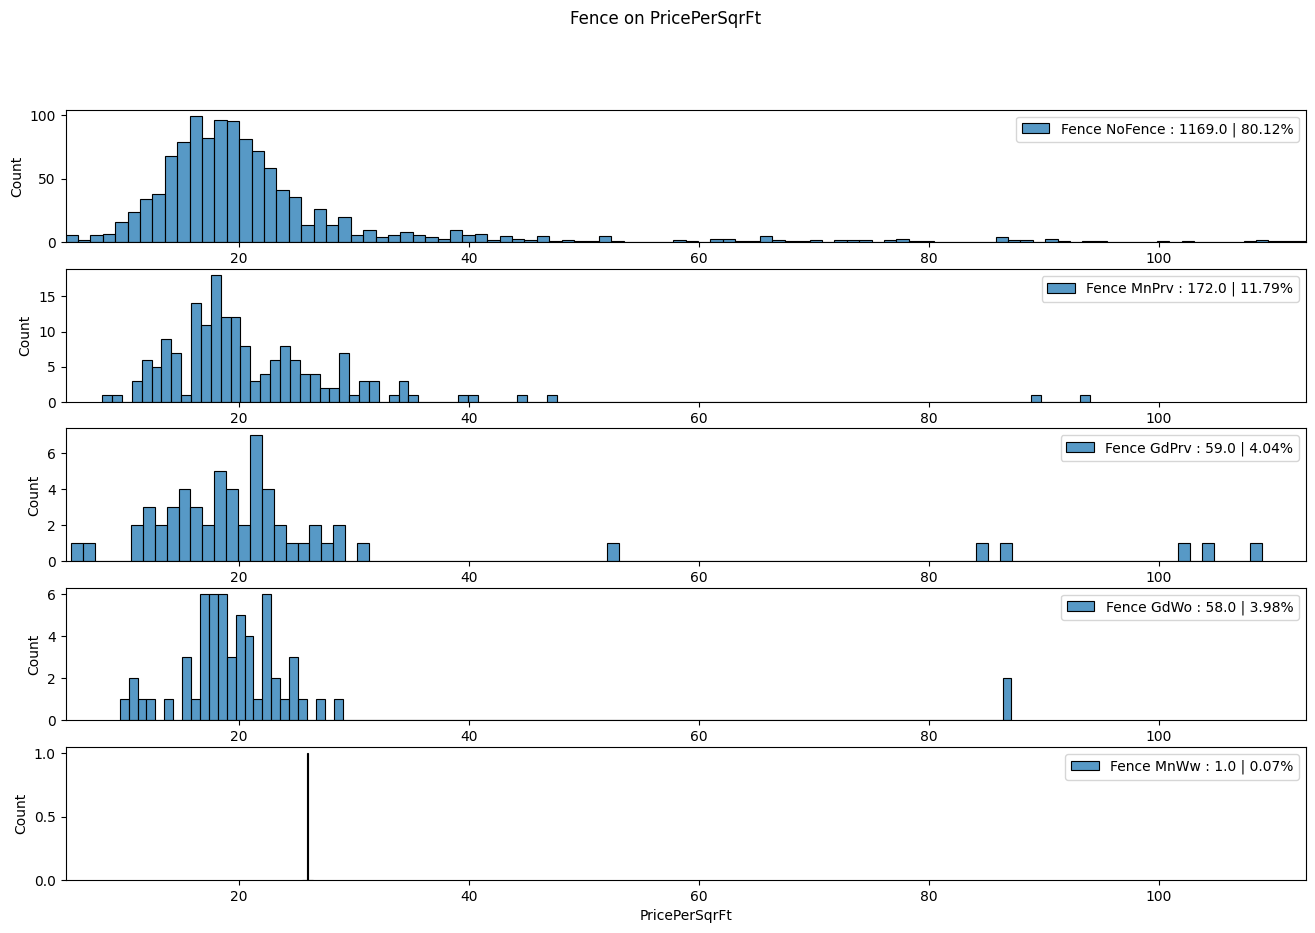

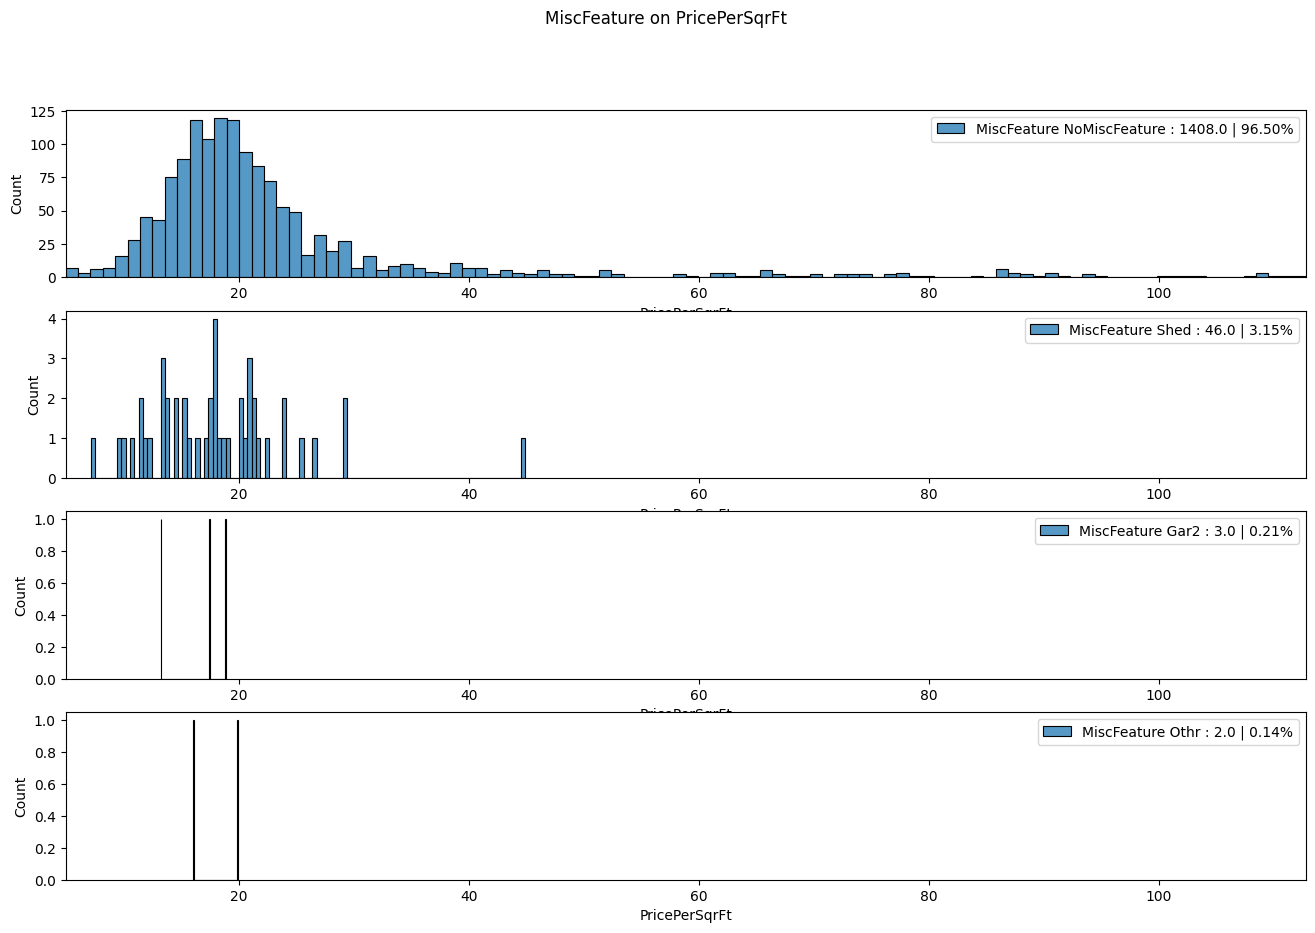

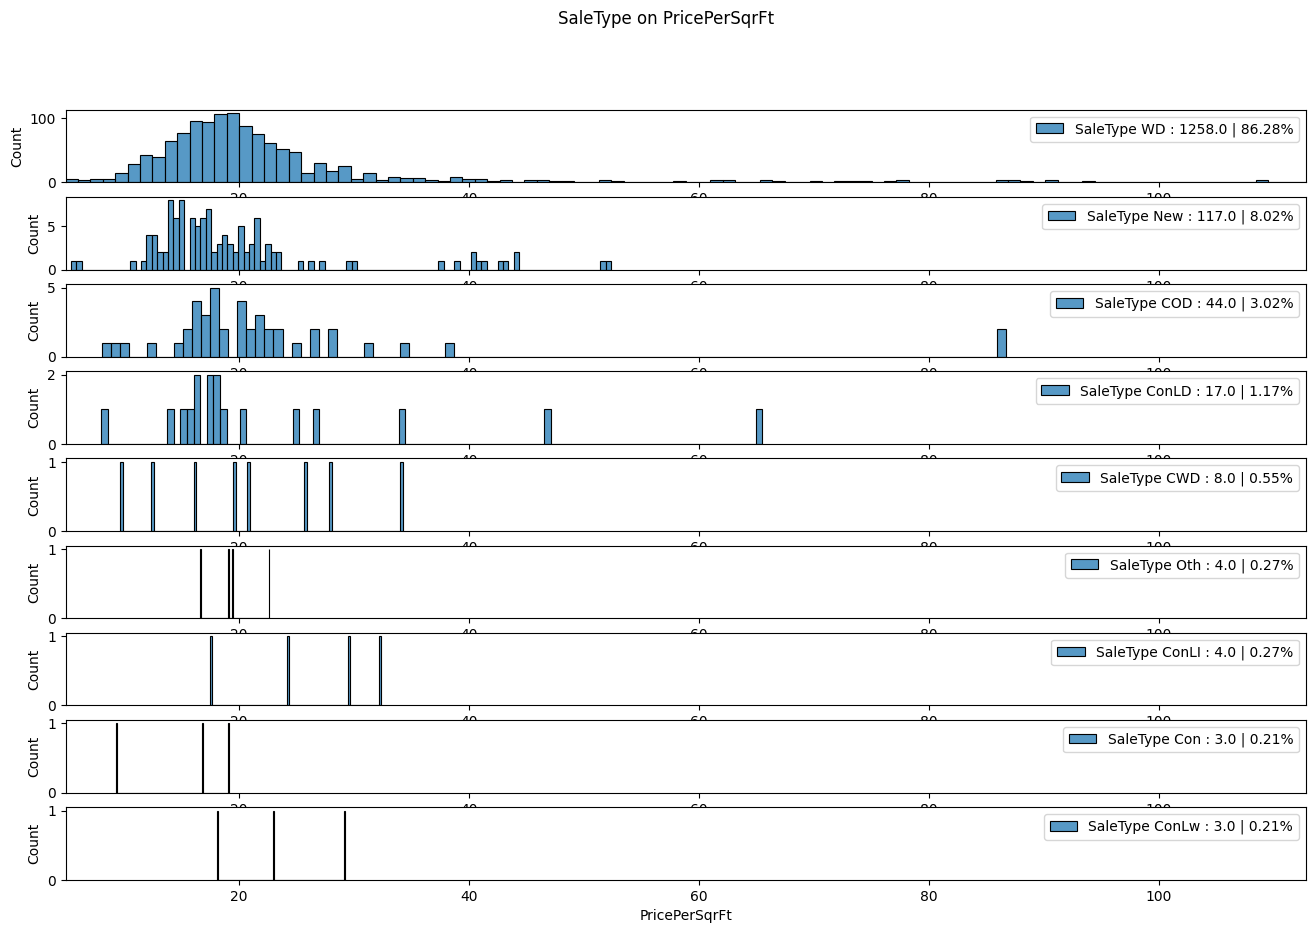

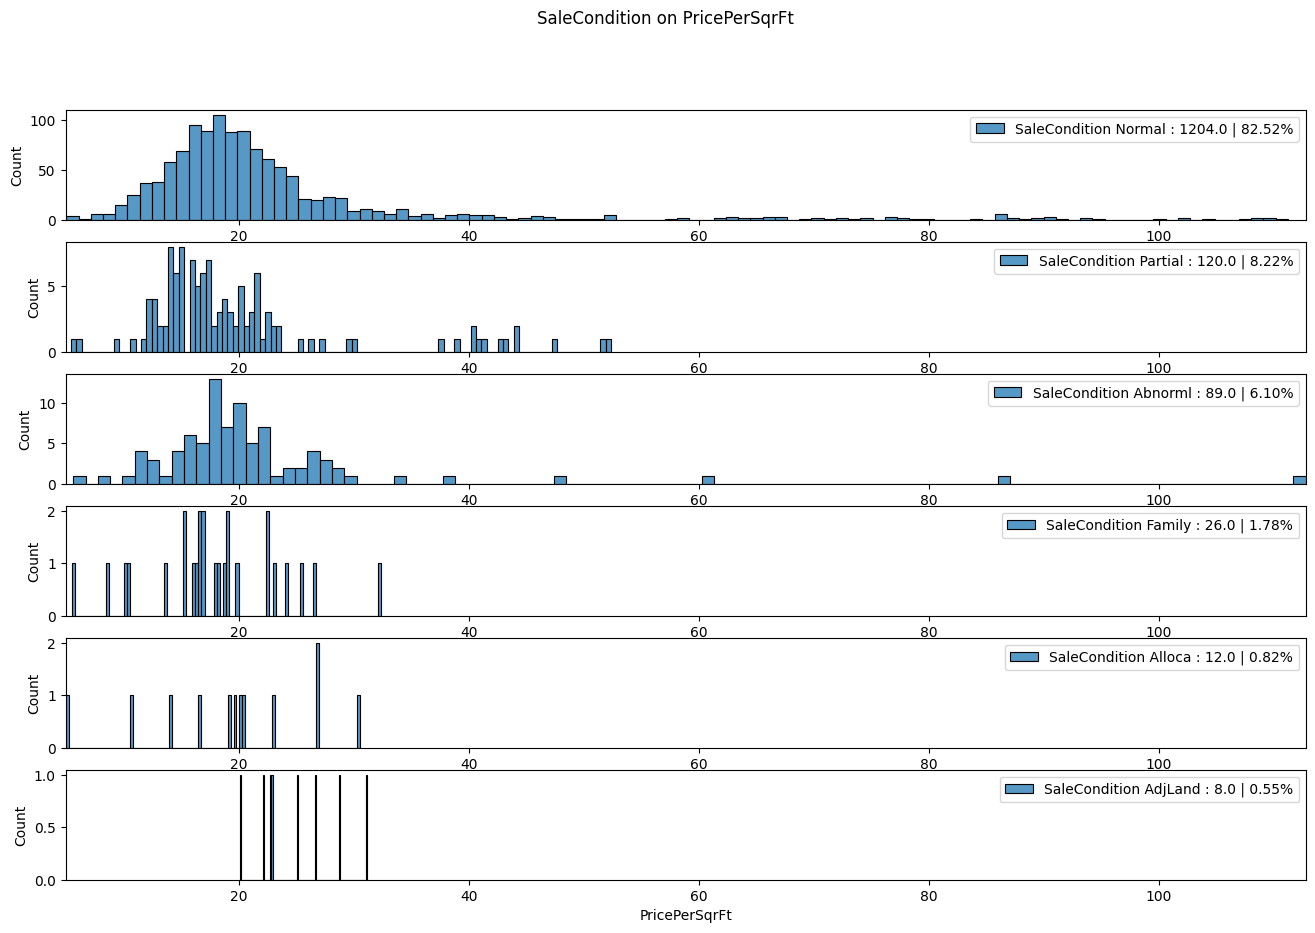

In [104]:
number_cols = test_data_csv.select_dtypes(include='object').head()
print(number_cols.columns.to_numpy())
plot_hist_for_unique_category_array(test_data_csv,number_cols.columns.to_numpy(),'PricePerSqrFt');